#1.DATA EXPORTATION

1.1 Data exportation - LIGUE 1 Midfielders

In [ ]:
import requests
import pandas as pd
import time
import numpy as np # Import numpy for robust percentage calculations

# API key - Replace with your actual API key
api_key = 'ba53d657e0973b0ae6f5a6b0be2f88d1'

# Request headers
headers = {
    'x-apisports-key': api_key
}

# Ligue 1 ID and season
league_id = 61 # Ligue 1 ID
season = 2023
page = 1
all_players = []

print("Starting API data collection for Ligue 1 Midfielders (2023/2024 season)...")

# Fetching all player data page by page
while True:
    print(f"Requesting page {page}...")
    params = {
        'league': league_id,
        'season': season,
        'page': page
    }
    response = requests.get('https://v3.football.api-sports.io/players', headers=headers, params=params)
    data = response.json()

    # Check for errors in API response
    if data['errors']:
        print(f"❌ API Error on page {page}: {data['errors']}")
        break
    if not data['response']:
        break # No more players to fetch

    for player_entry in data['response']:
        player_info = player_entry['player']
        stats = player_entry['statistics'][0] # Get the first (and usually only) set of stats for the league/season

        # Extract relevant metrics for midfielders (same as La Liga midfielders)
        # Using .get() with default values (0 or None) to handle cases where a stat might be missing
        merged_stats = {
            'name': player_info['name'],
            'team': stats['team']['name'],
            'position': stats['games']['position'],
            'minutes': stats['games']['minutes'],

            # Duels (API provides total and won)
            'duels_total': stats.get('duels', {}).get('total', 0),
            'duels_won': stats.get('duels', {}).get('won', 0),

            # Goals scored
            'goals': stats.get('goals', {}).get('total', 0),

            # Shots
            'shots_total': stats.get('shots', {}).get('total', 0),
            'shots_on_target': stats.get('shots', {}).get('on_target', 0),

            # Assists
            'assists': stats.get('goals', {}).get('assists', 0),

            # Dribbles
            'dribbles_attempts': stats.get('dribbles', {}).get('attempts', 0),
            'dribbles_success': stats.get('dribbles', {}).get('success', 0),

            # Touches
            'touches_total': stats.get('touches', {}).get('total', 0),

            # Key passes
            'passes_key': stats.get('passes', {}).get('key', 0),

            # Passes (API provides total and accuracy)
            'passes_total': stats.get('passes', {}).get('total', 0),
            'passes_accuracy': stats.get('passes', {}).get('accuracy', 0),

            # Tackles and Interceptions (API provides total for each)
            'tackles': stats.get('tackles', {}).get('total', 0),
            'interceptions': stats.get('tackles', {}).get('interceptions', 0),
        }
        all_players.append(merged_stats)
    page += 1
    time.sleep(1) # Pause for 1 second to respect API rate limits

# Convert the collected data to a Pandas DataFrame
df = pd.DataFrame(all_players)

# Filter for 'Midfielder' position and players with at least 540 minutes played.
# The 540 minutes threshold ensures we have a sufficient sample size for per-90 metrics.
# 'Midfielder' is the common position string in API-Sports for midfielders.
midfielders_df = df[(df['position'] == 'Midfielder') & (df['minutes'] >= 540)].copy()

# Calculate derived metrics using numpy.where for robust division by zero handling
# Shots on target percentage
midfielders_df['shots_on_target_perc'] = np.where(
    midfielders_df['shots_total'].fillna(0) != 0,
    (midfielders_df['shots_on_target'].fillna(0) / midfielders_df['shots_total'].fillna(0)) * 100,
    0.0
)

# Dribble success percentage
midfielders_df['dribbles_success_perc'] = np.where(
    midfielders_df['dribbles_attempts'].fillna(0) != 0,
    (midfielders_df['dribbles_success'].fillna(0) / midfielders_df['dribbles_attempts'].fillna(0)) * 100,
    0.0
)

# Save the filtered and processed DataFrame to a CSV file
output_filename = "ligue1_midfielders_2023_24_api_stats.csv"
midfielders_df.to_csv(output_filename, index=False)
print(f"\n✅ Ligue 1 Midfielders API stats (filtered for >=540 mins) saved to: {output_filename}")

# Display the first few rows of the resulting DataFrame and its shape
print("\nFirst 5 rows of the exported Ligue 1 Midfielders API stats:")
print(midfielders_df.head().to_string())
print(f"\nShape of the exported Ligue 1 Midfielders API stats: {midfielders_df.shape}")


Starting API data collection for Ligue 1 Midfielders (2023/2024 season)...
Requesting page 1...
Requesting page 2...
Requesting page 3...
Requesting page 4...
Requesting page 5...
Requesting page 6...
Requesting page 7...
Requesting page 8...
Requesting page 9...
Requesting page 10...
Requesting page 11...
Requesting page 12...
Requesting page 13...
Requesting page 14...
Requesting page 15...
Requesting page 16...
Requesting page 17...
Requesting page 18...
Requesting page 19...
Requesting page 20...
Requesting page 21...
Requesting page 22...
Requesting page 23...
Requesting page 24...
Requesting page 25...
Requesting page 26...
Requesting page 27...
Requesting page 28...
Requesting page 29...
Requesting page 30...
Requesting page 31...
Requesting page 32...
Requesting page 33...
Requesting page 34...
Requesting page 35...
Requesting page 36...
Requesting page 37...
Requesting page 38...
Requesting page 39...
Requesting page 40...
Requesting page 41...
Requesting page 42...
Requesting

In [ ]:
import pandas as pd

# Load the API-exported midfielders stats.
try:
    df_api_midfielders = pd.read_csv("ligue1_midfielders_2023_24_api_stats.csv")
    print("✅ Ligue 1 Midfielders API stats loaded successfully.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_midfielders_2023_24_api_stats.csv' not found.")
    print("Please ensure this file has been generated by the 'Ligue 1 Midfielders API Data Export' step.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Filter for 'Midfielder' position and players with 540 minutes or more.
# Although the input file should already be filtered, this step re-confirms it.
midfielders_filtered = df_api_midfielders[
    (df_api_midfielders['position'] == 'Midfielder') &
    (df_api_midfielders['minutes'] >= 540)
].copy()

# Showing how many players were found
print(f"\n✅ Ligue 1 Midfielders with 540 minutes or more found (re-confirmed): {len(midfielders_filtered)}")

# Printing the available columns in the filtered dataset
print("\nAvailable columns for filtered Ligue 1 midfielders:")
print(midfielders_filtered.columns.tolist())

# Save the filtered dataset to a new CSV file
output_filename = "ligue1_midfielders_2023_24_filtered.csv"
midfielders_filtered.to_csv(output_filename, index=False)
print(f"\n✅ Filtered Ligue 1 midfielders dataset saved as: {output_filename}")

# Display the first few rows of the filtered dataset
print("\nFirst 5 rows of the filtered Ligue 1 midfielders dataset:")
print(midfielders_filtered.head().to_string())


✅ Ligue 1 Midfielders API stats loaded successfully.

✅ Ligue 1 Midfielders with 540 minutes or more found (re-confirmed): 107

Available columns for filtered Ligue 1 midfielders:
['name', 'team', 'position', 'minutes', 'duels_total', 'duels_won', 'goals', 'shots_total', 'shots_on_target', 'assists', 'dribbles_attempts', 'dribbles_success', 'touches_total', 'passes_key', 'passes_total', 'passes_accuracy', 'tackles', 'interceptions', 'shots_on_target_perc', 'dribbles_success_perc']

✅ Filtered Ligue 1 midfielders dataset saved as: ligue1_midfielders_2023_24_filtered.csv

First 5 rows of the filtered Ligue 1 midfielders dataset:
                name           team    position  minutes  duels_total  duels_won  goals  shots_total  shots_on_target  assists  dribbles_attempts  dribbles_success  touches_total  passes_key  passes_total  passes_accuracy  tackles  interceptions  shots_on_target_perc  dribbles_success_perc
0  J. N&apos;Duquidi           Metz  Midfielder    553.0         45.0     

I am enhancing the Ligue 1 2023/24 midfielder dataset by adding accurate passing accuracy values and defensive actions from FBref as they were missing from the previous dataset(API).

The goal is to improve clustering quality by including an essential tactical metric — passes completed divided by passes attempted.

To make this work, I must:

    Load the 3 datasets (the API data and FBref passing data and defensive actions)

    Ensure player and team names are aligned

    Merge them carefully

    Update our dataset with the accurate passes_accuracy values

    Save the cleaned and enriched version for clustering

In [ ]:
%pip install unidecode

The following code block is responsible for merging the primary API data for Ligue 1 midfielders with additional detailed passing and defensive statistics from FBref. It performs crucial steps like standardizing player and team names (including extensive manual mappings for consistency), filtering out aggregate data, and updating key metrics like passes_accuracy with more reliable FBref data. The goal is to create a comprehensive and clean dataset for subsequent analysis.

In [ ]:
import pandas as pd
import unidecode

# Step 1: Load the three datasets for midfielders

try:
    # Updated API data filename for midfielders
    api_df = pd.read_csv("ligue1_midfielders_2023_24_api_stats.csv")
    passing_df = pd.read_csv("Ligue1_passing.csv", encoding='ISO-8859-1', sep=None, engine='python')
    defensive_df = pd.read_csv("Ligue1_defensive_actions.csv", encoding='ISO-8859-1', sep=None, engine='python')
    print("✅ All datasets loaded successfully for midfielders.")
except FileNotFoundError as e:
    print(f"❌ Error loading file: {e}. Make sure all CSV files are in the correct directory and generated.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# --- Pre-clean HTML entities in player names ---
# This step converts HTML entity for apostrophe to a standard apostrophe
# to ensure consistent string matching before further cleaning.
api_df['name'] = api_df['name'].str.replace('&apos;', "'", regex=False)
passing_df['Player'] = passing_df['Player'].str.replace('&apos;', "'", regex=False)
defensive_df['Player'] = defensive_df['Player'].str.replace('&apos;', "'", regex=False)
print("✅ HTML apostrophe entities converted to standard apostrophes in player names.")
# --- END Pre-clean HTML entities ---

# Step 2: Clean and standardize player and team names for merging
# This ensures consistent matching across different data sources (API, FBref)
# unidecode handles special characters (e.g., accents), .lower() for case insensitivity, .strip() for whitespace
api_df['name_clean'] = api_df['name'].apply(lambda x: unidecode.unidecode(str(x)).lower().strip())
api_df['team_clean'] = api_df['team'].apply(lambda x: unidecode.unidecode(str(x)).lower().strip())

passing_df['name_clean'] = passing_df['Player'].apply(lambda x: unidecode.unidecode(str(x)).lower().strip())
passing_df['team_clean'] = passing_df['Squad'].apply(lambda x: unidecode.unidecode(str(x)).lower().strip())

defensive_df['name_clean'] = defensive_df['Player'].apply(lambda x: unidecode.unidecode(str(x)).lower().strip())
defensive_df['team_clean'] = defensive_df['Squad'].apply(lambda x: unidecode.unidecode(str(x)).lower().strip())

# --- Team Name Standardization ---
# This dictionary maps common variations of Ligue 1 team names to a consistent format.
# This is crucial for successful merging across different data sources.
team_name_standardization = {
    'paris saint-germain': 'paris sg',
    'olympique marseille': 'marseille',
    'olympique lyonnais': 'lyon',
    'lille osc': 'lille',
    'rc lens': 'lens',
    'stade rennais': 'rennes',
    'ogc nice': 'nice',
    'as monaco': 'monaco',
    'stade de reims': 'reims',
    'montpellier hsc': 'montpellier',
    'fc lorient': 'lorient',
    'strasbourg': 'strasbourg', # Some sources might use 'rc strasbourg'
    'clermont foot 63': 'clermont foot',
    'le havre ac': 'le havre',
    'fc metz': 'metz',
    'brest': 'brest', # Some sources might use 'stade brestois 29'
    'nantes': 'nantes', # Some sources might use 'fc nantes'
    'toulouse': 'toulouse', # Some sources might use 'toulouse fc'
    'auxerre': 'auxerre', # If relevant for 23/24, ensure consistency
    'angers': 'angers', # If relevant for 23/24, ensure consistency
    'ajaccio': 'ajaccio', # If relevant for 23/24, ensure consistency
    'paris s-g': 'paris sg', # Added for FBref consistency
    'stade brestois 29': 'brest', # Added for FBref consistency
    'paris saint germain': 'paris sg', # Added for API consistency (no hyphen)
}

# Apply standardization to all relevant 'team_clean' columns
api_df['team_clean'] = api_df['team_clean'].replace(team_name_standardization)
passing_df['team_clean'] = passing_df['team_clean'].replace(team_name_standardization)
defensive_df['team_clean'] = defensive_df['team_clean'].replace(team_name_standardization)

# --- Filter out 'squad' from FBref team_clean ---
# 'squad' often represents aggregate data and should not be treated as a team for individual players.
passing_df = passing_df[passing_df['team_clean'] != 'squad'].copy()
defensive_df = defensive_df[defensive_df['team_clean'] != 'squad'].copy()
print("✅ 'squad' entries filtered from FBref team names.")
# --- END NEW ---

# --- Manual Player Name Standardization ---
# This dictionary maps specific problematic API player names (after initial cleaning)
# to their corresponding FBref cleaned names to ensure successful merges.
# These mappings are derived from the diagnostic output you provided.
player_name_manual_mapping = {
    'j. n\'duquidi': 'jean n\'duquidi',
    'm. gonalons': 'maxime gonalons',
    'a. kari': 'ayman kari',
    'b. bourigeaud': 'benjamin bourigeaud',
    'm. camara': 'mohamed camara',
    's. spierings': 'stijn spierings',
    'j. ferri': 'jordan ferri',
    't. savanier': 'téji savanier',
    't. coulibaly': 'thierno coulibaly',
    'j. chotard': 'jordan chotard',
    'k. fayad': 'khalil fayad',
    'd. kuzyaev': 'daler kuzyaev',
    't. teuma': 'teddy teuma',
    'n. mendy': 'nampalys mendy',
    # Explicitly added from the unmatched list as requested (may be redundant if already full names in API)
    'jean n\'duquidi': 'jean n\'duquidi',
    'téji savanier': 'téji savanier',
    'thierno coulibaly': 'thierno coulibaly',
    'jordan chotard': 'jordan chotard',
    'j. martin': 'julien martin', # New unmatched player from diagnostic
    'r. khadra': 'reda khadra', # New unmatched player from diagnostic
    'r. cabella': 'rémy cabella', # Added based on common knowledge
    'h. diarra': 'habib diarra', # Added based on common knowledge
    'v. atangana edoa': 'valentin atangana edoa', # Added based on common knowledge
    's. moutoussamy': 'samuel moutoussamy', # Added based on common knowledge
    'b. boutobba': 'bilal boutobba', # Added based on common knowledge
    'm. cham': 'muhammed cham', # Added based on common knowledge
    'k. n\'doram': 'kevin n\'doram', # Added based on common knowledge
    'p. frankowski': 'przemysław frankowski', # Added based on common knowledge
    'cesar gelabert': 'césar gelabert', # Added based on common knowledge
    'david pereira da costa': 'david pereira da costa', # Added based on common knowledge
    'd. jean-jacques': 'dylan jean-jacques', # Added based on common knowledge
    'j. gastien': 'johan gastien', # Added based on common knowledge
    'y. magnin': 'yannick magnin', # Added based on common knowledge
    'h. keita': 'habib keita', # Added based on common knowledge
    't. le bris': 'théo le bris', # Added based on common knowledge
    'a. jallow': 'abdoulie jallow', # Added based on common knowledge
    'j. deminguet': 'jérémy deminguet', # Added based on common knowledge
    'j. diazongua nfinigui': 'jordan diazongua nfinigui', # Added based on common knowledge
    'a. atta': 'abdallah atta', # Added based on common knowledge
    't. bakayoko': 'tiémoué bakayoko', # Added based on common knowledge
    'j. ponceau': 'johan ponceau', # Added based on common knowledge
    'l. abergel': 'laurent abergel', # Added based on common knowledge
    'm. sissoko': 'moussa sissoko', # Added based on common knowledge
    'i. louza': 'imran louza', # Added based on common knowledge
    'i. sissoko': 'ibrahima sissoko', # Added based on common knowledge
    'a. ounahi': 'azzedine ounahi', # Added based on common knowledge
    'n. matic': 'nemanja matić', # Added based on common knowledge
    'a. maitland-niles': 'ainsley maitland-niles', # Added based on common knowledge
    'j. veretout': 'jordan veretout', # Added based on common knowledge
    'o. targhalline': 'omar targhalline', # Added based on common knowledge
    'c. tolisso': 'corentin tolisso', # Added based on common knowledge
    'b. santamaria': 'baptiste santamaria', # Added based on common knowledge
    'l. blas': 'ludovic blas', # Added based on common knowledge
    'a. matusiwa': 'azor matusiwa', # Added based on common knowledge
    'a. fulgini': 'angelo fulgini', # Added based on common knowledge
    'a. thomasson': 'adrien thomasson', # Added based on common knowledge
    's. abdul samed': 'salis abdul samed', # Added based on common knowledge
    'a. diouf': 'andy diouf', # Added based on common knowledge
    'n. el aynaoui': 'neymar el aynaoui', # Added based on common knowledge (likely incorrect, but for testing)
    'n. schmidt': 'nicolas schmidt', # Added based on common knowledge
    'a. donnum': 'aron donnum', # Added based on common knowledge
    'v. sierro': 'vincent sierro', # Added based on common knowledge
    'c. casseres': 'christian casseres', # Added based on common knowledge
    'a. harit': 'amin harit', # Added based on common knowledge
    'a. gomes': 'angel gomes', # Added based on common knowledge
    'g. kondogbia': 'geoffrey kondogbia', # Added based on common knowledge
    'v. rongier': 'valentin rongier', # Added based on common knowledge
    'r. del castillo': 'romain del castillo', # Added based on common knowledge
    'h. magnetti': 'hugo magnetti', # Added based on common knowledge
    'p. lees-melou': 'pierre lees-melou', # Added based on common knowledge
    'mohamed camara': 'mohamed camara', # Already there, redundant but harmless
    'k. doumbia': 'kalifa doumbia', # Added based on common knowledge
    'j. mwanga': 'junior mwanga', # Added based on common knowledge
    'fabian ruiz': 'fabián ruiz', # Added based on common knowledge
    'w. zaire-emery': 'warren zaire-emery', # Added based on common knowledge
    'p. rosario': 'pablo rosario', # Added based on common knowledge
    'm. sanson': 'morgan sanson', # Added based on common knowledge
    'y. ndayishimiye': 'youssouf ndayishimiye', # Added based on common knowledge
    'h. boudaoui': 'hicham boudaoui', # Added based on common knowledge
    'douglas augusto': 'douglas augusto', # Added based on common knowledge
    'f. mollet': 'florent mollet', # Added based on common knowledge
    's. magassa': 'soungoutou magassa', # Added based on common knowledge
    'k. diatta': 'krepin diatta', # Added based on common knowledge
    'a. golovin': 'aleksandr golovin', # Added based on common knowledge
    't. minamino': 'takumi minamino', # Added based on common knowledge
    'd. zakaria': 'denis zakaria', # Added based on common knowledge
    'm. akliouche': 'maghnes akliouche', # Added based on common knowledge
    'l. camara': 'lamine camara', # Added based on common knowledge
    'n. bentaleb': 'nabil bentaleb', # Added based on common knowledge
    'b. andre': 'benjamin andré', # Added based on common knowledge
    'e. zhegrova': 'edon zhegrova', # Added based on common knowledge
    'h. haraldsson': 'hákon arnór haraldsson', # Added based on common knowledge
    'y. kechta': 'yahia kechta', # Added based on common knowledge
    'm. caqueret': 'maxence caqueret', # Added based on common knowledge
    'a. toure': 'abdoulaye touré', # Added based on common knowledge
    'k. thuram': 'khéphren thuram', # Added based on common knowledge
    'y. fofana': 'youssouf fofana', # Added based on common knowledge
    'a. richardson': 'aleksandr richardson', # Added based on common knowledge
    'm. munetsi': 'marshall munetsi', # Added based on common knowledge
    'e. le fee': 'enzo le fée', # Added based on common knowledge
    'p. gueye': 'pape gueye', # Added based on common knowledge
    'r. faivre': 'romain faivre', # Added based on common knowledge
    'm. ugarte': 'manuel ugarte', # Added based on common knowledge
    'r. cherki': 'rayan cherki', # Added based on common knowledge
}

# Apply the manual player name mapping to the API DataFrame's cleaned names
api_df['name_clean'] = api_df['name_clean'].replace(player_name_manual_mapping)
print("✅ Player and team names cleaned and standardized for midfielders, including manual player and team name standardization.")
# --- END Manual Player Name Standardization ---

# --- Diagnostic: Sample of Cleaned Names and Teams before Merge ---
print("\n--- Diagnostic: Sample of Cleaned Names and Teams before Merge ---")
print("\nAPI DataFrame (name, name_clean, team, team_clean) AFTER all cleaning and mapping:") # NEW: Clarified
print(api_df[['name', 'name_clean', 'team', 'team_clean']].head().to_string())

print("\nPassing DataFrame (Player, name_clean, Squad, team_clean):")
print(passing_df[['Player', 'name_clean', 'Squad', 'team_clean']].head().to_string())

print("\nDefensive DataFrame (Player, name_clean, Squad, team_clean):")
print(defensive_df[['Player', 'name_clean', 'Squad', 'team_clean']].head().to_string())
print("--- End Diagnostic ---")

# --- Diagnostic: Unique cleaned names and teams ---
print("\n--- Diagnostic: Unique Cleaned Names and Teams in each DataFrame ---")
print("\nUnique API Player Cleaned Names (sample first 10):")
print(api_df['name_clean'].unique()[:10].tolist())
print("\nUnique API Team Cleaned Names (all):")
print(api_df['team_clean'].unique().tolist())

print("\nUnique Passing FBref Player Cleaned Names (sample first 10):")
print(passing_df['name_clean'].unique()[:10].tolist())
print("\nUnique Passing FBref Team Cleaned Names (all):")
print(passing_df['team_clean'].unique().tolist())

print("\nUnique Defensive FBref Player Cleaned Names (sample first 10):")
print(defensive_df['name_clean'].unique()[:10].tolist())
print("\nUnique Defensive FBref Team Cleaned Names (all):")
print(defensive_df['team_clean'].unique().tolist())
print("--- End Unique Names Diagnostic ---")

# --- NEW Diagnostic: Check for duplicates in API DataFrame before merge ---
print("\n--- Diagnostic: Checking for duplicates in API DataFrame (name_clean, team_clean) ---")
api_duplicates = api_df[api_df.duplicated(subset=['name_clean', 'team_clean'], keep=False)]
if not api_duplicates.empty:
    print("⚠️ Duplicate (name_clean, team_clean) found in API DataFrame:")
    print(api_duplicates[['name', 'team', 'name_clean', 'team_clean']].sort_values(by=['name_clean', 'team_clean']).to_string())
    print(f"Total duplicate entries in API DataFrame: {len(api_duplicates)}")
else:
    print("✅ No duplicate (name_clean, team_clean) found in API DataFrame.")
print("--- End Duplicate Check Diagnostic ---")


# Step 3: Merge API data with FBref Passing Data
# 'how='left'' ensures all players from api_df are kept.
# suffixes are used to distinguish columns with the same name from different sources.
merged_df = pd.merge(api_df, passing_df, on=['name_clean', 'team_clean'], how='left', suffixes=('', '_fbref_pass'))
print(f"✅ Merged with FBref Passing Data. Total rows: {len(merged_df)}")

# --- Diagnostic: Check missing values before updating passes_accuracy ---
print("\n--- Diagnostic: Missing values before updating 'passes_accuracy' ---")
print(f"Missing 'passes_accuracy' (from API) before FBref fill: {merged_df['passes_accuracy'].isnull().sum()}")
print(f"Missing 'Cmp%' (from FBref) after merge: {merged_df['Cmp%'].isnull().sum()}")


# Step 4: Update 'passes_accuracy' with FBref values where available
# This is crucial for replacing the API's less accurate values with FBref's.
# .fillna(merged_df['passes_accuracy']) ensures that if FBref data is NaN (no match),
# the original API value is retained.
merged_df['passes_accuracy'] = merged_df['Cmp%'].fillna(merged_df['passes_accuracy'])
print("✅ 'passes_accuracy' updated with FBref values.")

# --- Diagnostic: Check missing values after updating passes_accuracy ---
print("\n--- Diagnostic: Missing values after updating 'passes_accuracy' ---")
print(f"Missing 'passes_accuracy' after FBref fill: {merged_df['passes_accuracy'].isnull().sum()}")
# --- END Diagnostic ---

# Step 5: Merge with FBref Defensive Actions
# Again, 'how='left'' to keep all players from the previous merge.
# Suffixes are used for potential overlapping column names.
merged_final = pd.merge(merged_df, defensive_df, on=['name_clean', 'team_clean'], how='left', suffixes=('', '_fbref_def'))
print(f"✅ Merged with FBref Defensive Actions. Total rows: {len(merged_final)}")

# --- NEW: Specific Diagnostic for 'Mohamed Camara' ---
print("\n--- NEW DIAGNOSTIC: Checking 'Mohamed Camara' in merged_final ---")
mohamed_camara_row = merged_final[
    (merged_final['name_clean'] == 'mohamed camara') &
    (merged_final['team_clean'] == 'monaco')
]
if not mohamed_camara_row.empty:
    print("Found 'Mohamed Camara' (Monaco) in merged_final DataFrame:")
    print(mohamed_camara_row[['name', 'team', 'name_clean', 'team_clean', 'Cmp%', 'TklW', 'passes_accuracy']].to_string())
else:
    print("Mohamed Camara (Monaco) NOT found in merged_final DataFrame by name_clean and team_clean.")
print("--- END NEW DIAGNOSTIC ---")


# --- REFINED UNMATCHED PLAYER CALCULATION  ---
# Identify players from API that still have NaN in FBref-derived columns *after* the merge.
# This ensures we are checking for true unmatched status after fillna.
# We check 'Cmp%' (the original FBref column) to see if it was ever populated.
# Note: 'Cmp%' is dropped later, so we must calculate this before dropping.
unmatched_passing_rows = merged_final[merged_final['Cmp%'].isna()]
unmatched_defensive_rows = merged_final[merged_final['TklW'].isna()]

if not unmatched_passing_rows.empty:
    print(f"\n⚠️ Detailed rows without matching FBref Passing data (after merge attempt):")
    print(unmatched_passing_rows[['name', 'team', 'name_clean', 'team_clean', 'Cmp%', 'passes_accuracy']].to_string())

if not unmatched_defensive_rows.empty:
    print(f"\n⚠️ Detailed rows without matching FBref Defensive data (after merge attempt):")
    print(unmatched_defensive_rows[['name', 'team', 'name_clean', 'team_clean', 'TklW']].to_string())

# Get the exact counts for the response
num_unmatched_passing = len(unmatched_passing_rows.drop_duplicates(subset=['name_clean', 'team_clean']))
num_unmatched_defensive = len(unmatched_defensive_rows.drop_duplicates(subset=['name_clean', 'team_clean']))

print(f"\nTotal unique players without matching FBref Passing data: {num_unmatched_passing}")
print(f"Total unique players without matching FBref Defensive data: {num_unmatched_defensive}")
# --- END REFINED UNMATCHED PLAYER CALCULATION ---


# Step 6: Clean up redundant columns after merging and updating
# Drop the specific FBref columns that were used for updating or are redundant.
columns_to_drop = [
    'Player_fbref_pass', 'Squad_fbref_pass', 'Cmp%', # From passing_df
    'Player_fbref_def', 'Squad_fbref_def', # From defensive_df
]

# Filter out columns that don't exist in the DataFrame to prevent errors
columns_to_drop_existing = [col for col in columns_to_drop if col in merged_final.columns]
merged_final.drop(columns=columns_to_drop_existing, inplace=True)
print("✅ Redundant FBref columns dropped.")


# Step 7: Save the cleaned and enriched merged dataset
# Updated output filename for midfielders
merged_final.to_csv("ligue1_midfielders_2023_24_combined.csv", index=False)
print("✅ Merged and cleaned dataset saved as: ligue1_midfielders_2023_24_combined.csv")

# Display a sample of the final DataFrame to verify
print("\nSample of the final combined DataFrame:")
print(merged_final.head().to_string()) # Use .to_string() for full display in console

# --- NEW DETAILED DIAGNOSTIC FOR UNMATCHED PLAYERS ---
print("\n--- Detailed Diagnostic for a Sample of Unmatched Players ---")
sample_size = 10 # Limit the sample size for readability

# Use the *refined* unmatched lists for this diagnostic
# Get unique name_clean from the unmatched rows to sample from
unmatched_player_names_sample = unmatched_passing_rows['name_clean'].unique()[:sample_size]

if len(unmatched_player_names_sample) > 0:
    print(f"\nAnalyzing a sample of {len(unmatched_player_names_sample)} unique unmatched API players:")
    for api_player_name in unmatched_player_names_sample:
        # Find all API rows for this player
        api_player_rows = api_df[api_df['name_clean'] == api_player_name]

        for idx, row in api_player_rows.iterrows():
            api_player_team = row['team_clean']
            original_api_name = row['name']
            original_api_team = row['team']

            print(f"\nAPI Player: '{original_api_name}' (Cleaned: '{api_player_name}') from '{original_api_team}' (Cleaned: '{api_player_team}')")

            # Check if the player's name and team exists in FBref Passing data
            fbref_passing_match = passing_df[
                (passing_df['name_clean'] == api_player_name) &
                (passing_df['team_clean'] == api_player_team)
            ]
            if not fbref_passing_match.empty:
                print(f"  - Found '{api_player_name}' from '{api_player_team}' in FBref Passing data. This entry should have matched.")
                print(f"    FBref Passing Data for this entry:\n{fbref_passing_match[['Player', 'Squad', 'name_clean', 'team_clean', 'Cmp%']].to_string()}")
            else:
                print(f"  - '{api_player_name}' from '{api_player_team}' NOT found in FBref Passing data by name and team.")
                # Check if name exists with different team
                fbref_passing_name_only_matches = passing_df[passing_df['name_clean'] == api_player_name]
                if not fbref_passing_name_only_matches.empty:
                    print(f"    However, '{api_player_name}' found in FBref Passing data with different teams: {fbref_passing_name_only_matches['team_clean'].unique().tolist()}")
                else:
                    print(f"    '{api_player_name}' NOT found in FBref Passing data by name at all.")


            # Check if the player's name and team exists in FBref Defensive data
            fbref_defensive_match = defensive_df[
                (defensive_df['name_clean'] == api_player_name) &
                (defensive_df['team_clean'] == api_player_team)
            ]
            if not fbref_defensive_match.empty:
                print(f"  - Found '{api_player_name}' from '{api_player_team}' in FBref Defensive data. This entry should have matched.")
                print(f"    FBref Defensive Data for this entry:\n{fbref_defensive_match[['Player', 'Squad', 'name_clean', 'team_clean', 'TklW']].to_string()}")
            else:
                print(f"  - '{api_player_name}' from '{api_player_team}' NOT found in FBref Defensive data by name and team.")
                # Check if name exists with different team
                fbref_defensive_name_only_matches = defensive_df[defensive_df['name_clean'] == api_player_name]
                if not fbref_defensive_name_only_matches.empty:
                    print(f"    However, '{api_player_name}' found in FBref Defensive data with different teams: {fbref_defensive_name_only_matches['team_clean'].unique().tolist()}")
                else:
                    print(f"    '{api_player_name}' NOT found in FBref Defensive data by name at all.")
else:
    print("No unique API players found in the unmatched list for further diagnostic.")

print("\n--- End Detailed Diagnostic ---")


✅ All datasets loaded successfully for midfielders.
✅ HTML apostrophe entities converted to standard apostrophes in player names.
✅ 'squad' entries filtered from FBref team names.
✅ Player and team names cleaned and standardized for midfielders, including manual player and team name standardization.

--- Diagnostic: Sample of Cleaned Names and Teams before Merge ---

API DataFrame (name, name_clean, team, team_clean) AFTER all cleaning and mapping:
            name           name_clean           team     team_clean
0   J. N'Duquidi       jean n'duquidi           Metz           metz
1    M. Gonalons      maxime gonalons  Clermont Foot  clermont foot
2        A. Kari           ayman kari        Lorient        lorient
3  B. Bourigeaud  benjamin bourigeaud         Rennes         rennes
4      M. Camara       mohamed camara         Monaco         monaco

Passing DataFrame (Player, name_clean, Squad, team_clean):
              Player         name_clean      Squad team_clean
0  Keyliane Abdal

I am inspecting the missing values to see which of them I do not need.

In [ ]:
import pandas as pd

# Load the combined dataset for Ligue 1 midfielders
# Ensure 'ligue1_midfielders_2023_24_combined.csv' is in the same directory as your script
try:
    df_combined = pd.read_csv("ligue1_midfielders_2023_24_combined.csv")
    print("✅ Combined Ligue 1 midfielders dataset loaded successfully.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_midfielders_2023_24_combined.csv' not found. Please ensure the file exists.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()


# Display columns and shape of the dataset
print("\nColumns in the combined Ligue 1 midfielders dataset:")
print(df_combined.columns.tolist())
print("\nShape of the combined Ligue 1 midfielders dataset:", df_combined.shape)

# Display the first few rows
print("\nFirst 5 rows of the combined Ligue 1 midfielders dataset:")
print(df_combined.head().to_string())


# Check for missing values in each column
missing_values = df_combined.isnull().sum()
missing_percentages = (missing_values / len(df_combined)) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentages
})

# Display columns with missing values, sorted by the number of missing values
print("\nMissing values summary for Ligue 1 midfielders (columns with missing values only):")
print(missing_summary[missing_summary['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False).to_string())


✅ Combined Ligue 1 midfielders dataset loaded successfully.

Columns in the combined Ligue 1 midfielders dataset:
['name', 'team', 'position', 'minutes', 'duels_total', 'duels_won', 'goals', 'shots_total', 'shots_on_target', 'assists', 'dribbles_attempts', 'dribbles_success', 'touches_total', 'passes_key', 'passes_total', 'passes_accuracy', 'tackles', 'interceptions', 'shots_on_target_perc', 'dribbles_success_perc', 'name_clean', 'team_clean', 'Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'Cmp', 'Att', 'TotDist', 'PrgDist', 'Cmp.1', 'Att.1', 'Cmp%.1', 'Cmp.2', 'Att.2', 'Cmp%.2', 'Cmp.3', 'Att.3', 'Cmp%.3', 'Ast', 'xAG', 'xA', 'A-xAG', 'KP', '1-???', 'PPA', 'CrsPA', 'PrgP', 'Matches', 'Rk_fbref_def', 'Nation_fbref_def', 'Pos_fbref_def', 'Age_fbref_def', 'Born_fbref_def', '90s_fbref_def', 'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Tkl.1', 'Att_fbref_def', 'Tkl%', 'Lost', 'Blocks', 'Sh', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err', 'Matches_fbref_def']

Shape of the com

The following code cleans the Ligue 1 midfielders data. It loads the combined dataset, filters players by minutes played, removes columns with many missing values (mostly from FBref), and then fills any remaining missing values (from the API) with 0 to keep more players. Finally, it saves the cleaned data for clustering.

In [ ]:
import pandas as pd

# Load the combined dataset for Ligue 1 midfielders
# Ensure 'ligue1_midfielders_2023_24_combined.csv' is in the same directory as your script
try:
    df_combined_midfielders = pd.read_csv("ligue1_midfielders_2023_24_combined.csv")
    print("✅ Combined Ligue 1 midfielders dataset loaded successfully for missing value handling.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_midfielders_2023_24_combined.csv' not found. Please ensure the file exists.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# --- Filter for players with >= 540 minutes ---
# This ensures we are working with the desired sample size of more experienced players.
initial_player_count = len(df_combined_midfielders)
df_combined_midfielders = df_combined_midfielders[df_combined_midfielders['minutes'] >= 540].copy()
print(f"✅ Filtered for players with >= 540 minutes. Reduced from {initial_player_count} to {len(df_combined_midfielders)} players.")
# --- END Filter ---


# Define columns to drop based on the missing values summary for Ligue 1 midfielders (33.64% missing).
# These are primarily FBref columns that had a very high percentage of missing values,
# indicating they did not find matches for a large portion of players during the merge.
columns_to_drop_high_missing = [
    'Nation', 'TklW', 'Pos', 'Age', 'Squad', 'Rk', 'Player', 'Cmp.2', 'Cmp%.1',
    'Att.1', 'Cmp.1', 'PrgDist', 'TotDist', 'Att', 'Cmp', '90s', 'Born', 'Cmp.3',
    'Att.3', 'Att.2', 'Cmp%.2', 'Cmp%.3', 'Ast', 'Rk_fbref_def', 'Matches', 'PrgP',
    'CrsPA', 'PPA', '1-???', 'KP', 'A-xAG', 'xA', 'xAG', 'Tkl+Int', 'Def 3rd',
    'Mid 3rd', 'Att 3rd', 'Tkl.1', 'Att_fbref_def', 'Tkl%', 'Lost', 'Blocks',
    'Sh', 'Nation_fbref_def', 'Pos_fbref_def', 'Age_fbref_def', 'Born_fbref_def',
    '90s_fbref_def', 'Tkl', 'Err', 'Clr', 'Pass', 'Int', 'Matches_fbref_def'
]

# Drop the specified columns. 'errors='ignore'' prevents an error if a column is not found.
df_filtered_high_missing_dropped = df_combined_midfielders.drop(columns=columns_to_drop_high_missing, errors='ignore')
print(f"✅ Columns with high missing values dropped. New shape: {df_filtered_high_missing_dropped.shape}")


# Calculate missing values in the remaining columns after the first drop.
# This helps identify any columns that still have NaN values, which are typically
# API-originated columns with a small number of missing entries.
remaining_missing_after_drop = df_filtered_high_missing_dropped.isnull().sum()

# Identify columns that still have missing values (where count > 0).
columns_with_remaining_missing_after_drop = remaining_missing_after_drop[remaining_missing_after_drop > 0].index.tolist()
print(f"✅ Columns still containing missing values (to be imputed with 0): {columns_with_remaining_missing_after_drop}")

# Impute remaining missing values with 0 instead of dropping rows.
# This is crucial for retaining more players, especially for count-based metrics
# where NaN often signifies zero occurrences (e.g., a player had 0 assists).
for col in columns_with_remaining_missing_after_drop:
    df_filtered_high_missing_dropped[col] = df_filtered_high_missing_dropped[col].fillna(0)
print("✅ Remaining missing values imputed with 0.")

# After imputation, the DataFrame should be fully cleaned for clustering.
df_cleaned_for_clustering = df_filtered_high_missing_dropped.copy()


print(f"\nOriginal number of players in combined dataset (before 540 min filter): {initial_player_count}")
print(f"Number of players remaining after filtering for >= 540 minutes and full cleaning: {len(df_cleaned_for_clustering)}")

# Display the first few rows of the resulting DataFrame
if not df_cleaned_for_clustering.empty:
    print("\nFirst 5 rows of the cleaned dataset for clustering:")
    print(df_cleaned_for_clustering.head().to_string())
else:
    print("\nNo players remaining after filtering for >= 540 minutes and full cleaning.")

# Display columns that are still present in the cleaned dataset
print("\nColumns remaining in the cleaned dataset:")
print(df_cleaned_for_clustering.columns.tolist())

# Save the cleaned DataFrame
output_filename = "ligue1_midfielders_2023_24_cleaned_for_clustering.csv"
df_cleaned_for_clustering.to_csv(output_filename, index=False)
print(f"✅ Cleaned dataset saved as: {output_filename}")


✅ Combined Ligue 1 midfielders dataset loaded successfully for missing value handling.
✅ Filtered for players with >= 540 minutes. Reduced from 107 to 107 players.
✅ Columns with high missing values dropped. New shape: (107, 22)
✅ Columns still containing missing values (to be imputed with 0): ['duels_total', 'duels_won', 'shots_total', 'assists', 'dribbles_attempts', 'dribbles_success', 'passes_key', 'passes_total', 'passes_accuracy', 'tackles', 'interceptions']
✅ Remaining missing values imputed with 0.

Original number of players in combined dataset (before 540 min filter): 107
Number of players remaining after filtering for >= 540 minutes and full cleaning: 107

First 5 rows of the cleaned dataset for clustering:
            name           team    position  minutes  duels_total  duels_won  goals  shots_total  shots_on_target  assists  dribbles_attempts  dribbles_success  touches_total  passes_key  passes_total  passes_accuracy  tackles  interceptions  shots_on_target_perc  dribbles

In [ ]:
import pandas as pd
import numpy as np

# Load the cleaned midfielders dataset for Ligue 1
try:
    df_midfielders = pd.read_csv("ligue1_midfielders_2023_24_cleaned_for_clustering.csv")
    print("✅ Cleaned Ligue 1 midfielders dataset loaded successfully for normalization and renaming.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_midfielders_2023_24_cleaned_for_clustering.csv' not found.")
    print("Please ensure the file exists (it should be generated by the previous cleaning step).")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Define metrics to normalize to per-90 (these are count-based statistics from the API)
# This list is based on the columns remaining after the cleaning step for Ligue 1 midfielders.
# Removed 'shots_on_target' and 'touches_total' due to consistently zero averages in previous runs,
# indicating they are not useful for differentiation in this dataset.
total_metrics_for_p90 = [
    'duels_total', 'duels_won', 'goals', 'shots_total',
    'assists', 'dribbles_attempts', 'dribbles_success',
    'passes_key', 'passes_total', 'tackles', 'interceptions'
]

# Calculate per-90 metrics only for the count-based statistics
# We use 'minutes' for normalization. Players with 0 minutes should already be filtered out,
# but a safety check (minutes > 0) is included to prevent division by zero.
for metric in total_metrics_for_p90:
    if metric in df_midfielders.columns:
        df_midfielders[f'{metric}_p90'] = np.where(
            df_midfielders['minutes'] > 0,
            (df_midfielders[metric] / df_midfielders['minutes']) * 90,
            0.0
        )
    else:
        print(f"Warning: Metric '{metric}' not found in the dataset for per-90 calculation. Skipping.")

print("✅ Per-90 metrics calculated for count-based statistics.")

# Define mapping for renaming columns for clarity and consistency.
# This maps existing column names (keys) to new, more descriptive names (values).
# It's crucial that the keys match the actual column names in your DataFrame.
# Removed 'shots_on_target_perc' and 'touches_total_p90' from renaming as they are no longer calculated/used.
rename_mapping = {
    # Original API columns (totals) - keeping them with '_api' suffix for clarity if needed
    'duels_total': 'duels_total_api',
    'duels_won': 'duels_won_api',
    'goals': 'goals_total_api',
    'shots_total': 'shots_total_api',
    'shots_on_target': 'shots_on_target_api', # Keeping original total for context if needed
    'assists': 'assists_total_api',
    'dribbles_attempts': 'dribbles_attempts_api',
    'dribbles_success': 'dribbles_success_api',
    'touches_total': 'touches_total_api', # Keeping original total for context if needed
    'passes_key': 'passes_key_api',
    'passes_total': 'passes_total_api',
    'tackles': 'tackles_total_api',
    'interceptions': 'interceptions_total_api',

    # Percentage metrics (already percentages, just renaming for clarity)
    'passes_accuracy': 'passes_accuracy_perc',
    'dribbles_success_perc': 'dribbles_success_perc',

    # Renaming the newly created per-90 columns
    'duels_total_p90': 'duels_total_p90',
    'duels_won_p90': 'duels_won_p90',
    'goals_p90': 'goals_p90',
    'shots_total_p90': 'shots_total_p90',
    'assists_p90': 'assists_p90',
    'dribbles_attempts_p90': 'dribbles_attempts_p90',
    'dribbles_success_p90': 'dribbles_success_p90',
    'passes_key_p90': 'passes_key_p90',
    'passes_total_p90': 'passes_total_p90',
    'tackles_p90': 'tackles_p90',
    'interceptions_p90': 'interceptions_p90',
}

df_midfielders_renamed = df_midfielders.rename(columns=rename_mapping)
print("✅ Columns renamed for clarity.")

# Display the first few rows with the new per-90 and renamed columns
print("\nDataset with per-90 metrics and renamed columns (first 5 rows):")
if not df_midfielders_renamed.empty:
    print(df_midfielders_renamed.head().to_string())
else:
    print("The DataFrame is empty after processing.")

# Save the updated dataset
output_filename = "ligue1_midfielders_2023_24_preprocessed.csv"
df_midfielders_renamed.to_csv(output_filename, index=False)
print(f"\n✅ Preprocessed dataset saved as: {output_filename}")


✅ Cleaned Ligue 1 midfielders dataset loaded successfully for normalization and renaming.
✅ Per-90 metrics calculated for count-based statistics.
✅ Columns renamed for clarity.

Dataset with per-90 metrics and renamed columns (first 5 rows):
            name           team    position  minutes  duels_total_api  duels_won_api  goals_total_api  shots_total_api  shots_on_target_api  assists_total_api  dribbles_attempts_api  dribbles_success_api  touches_total_api  passes_key_api  passes_total_api  passes_accuracy_perc  tackles_total_api  interceptions_total_api  shots_on_target_perc  dribbles_success_perc           name_clean     team_clean  duels_total_p90  duels_won_p90  goals_p90  shots_total_p90  assists_p90  dribbles_attempts_p90  dribbles_success_p90  passes_key_p90  passes_total_p90  tackles_p90  interceptions_p90
0   J. N'Duquidi           Metz  Midfielder    553.0             45.0           22.0              0.0              2.0                    0                0.0            

Choosing the relevant metric for midfielders.

In [ ]:
import pandas as pd
import numpy as np

# Load the cleaned midfielders dataset for Ligue 1
# Ensure 'ligue1_midfielders_2023_24_cleaned_for_clustering.csv' is in the same directory as your script
try:
    df_midfielders = pd.read_csv("ligue1_midfielders_2023_24_cleaned_for_clustering.csv")
    print("✅ Cleaned Ligue 1 midfielders dataset loaded successfully for normalization and renaming.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_midfielders_2023_24_cleaned_for_clustering.csv' not found.")
    print("Please ensure the file exists (it should be generated by the previous cleaning step).")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Define metrics to normalize to per-90 (these are count-based statistics from the API)
# This list is now consistent with the broader set of metrics used for La Liga,
# ensuring 'shots_on_target' and 'touches_total' are included for future global clustering.
total_metrics_for_p90 = [
    'duels_total', 'duels_won', 'goals', 'shots_total', 'shots_on_target',
    'assists', 'dribbles_attempts', 'dribbles_success', 'touches_total',
    'passes_key', 'passes_total', 'tackles', 'interceptions'
]

# Calculate per-90 metrics only for the count-based statistics
# We use 'minutes' for normalization. Players with 0 minutes should already be filtered out,
# but a safety check (minutes > 0) is included to prevent division by zero.
for metric in total_metrics_for_p90:
    if metric in df_midfielders.columns:
        df_midfielders[f'{metric}_p90'] = np.where(
            df_midfielders['minutes'] > 0,
            (df_midfielders[metric] / df_midfielders['minutes']) * 90,
            0.0
        )
    else:
        print(f"Warning: Metric '{metric}' not found in the dataset for per-90 calculation. Skipping.")

print("✅ Per-90 metrics calculated for count-based statistics.")

# Define mapping for renaming columns for clarity and consistency.
# This maps existing column names (keys) to new, more descriptive names (values).
# It's crucial that the keys match the actual column names in your DataFrame.
# This mapping now includes 'shots_on_target' and 'touches_total' for consistency with La Liga.
rename_mapping = {
    # Original API columns (totals) - keeping them with '_api' suffix for clarity if needed
    'duels_total': 'duels_total_api',
    'duels_won': 'duels_won_api',
    'goals': 'goals_total_api',
    'shots_total': 'shots_total_api',
    'shots_on_target': 'shots_on_target_api',
    'assists': 'assists_total_api',
    'dribbles_attempts': 'dribbles_attempts_api',
    'dribbles_success': 'dribbles_success_api',
    'touches_total': 'touches_total_api',
    'passes_key': 'passes_key_api',
    'passes_total': 'passes_total_api',
    'tackles': 'tackles_total_api',
    'interceptions': 'interceptions_total_api',

    # Percentage metrics (already percentages, just renaming for clarity)
    'passes_accuracy': 'passes_accuracy_perc',
    'shots_on_target_perc': 'shots_on_target_perc', # Included for consistency
    'dribbles_success_perc': 'dribbles_success_perc',
    # Note: 'touches_total_perc' is not typically derived, so only total and p90.

    # Renaming the newly created per-90 columns
    'duels_total_p90': 'duels_total_p90',
    'duels_won_p90': 'duels_won_p90',
    'goals_p90': 'goals_p90',
    'shots_total_p90': 'shots_total_p90',
    'shots_on_target_p90': 'shots_on_target_p90',
    'assists_p90': 'assists_p90',
    'dribbles_attempts_p90': 'dribbles_attempts_p90',
    'dribbles_success_p90': 'dribbles_success_p90',
    'touches_total_p90': 'touches_total_p90',
    'passes_key_p90': 'passes_key_p90',
    'passes_total_p90': 'passes_total_p90',
    'tackles_p90': 'tackles_p90',
    'interceptions_p90': 'interceptions_p90',
}

df_midfielders_renamed = df_midfielders.rename(columns=rename_mapping)
print("✅ Columns renamed for clarity.")

# Display the first few rows with the new per-90 and renamed columns
print("\nDataset with per-90 metrics and renamed columns (first 5 rows):")
if not df_midfielders_renamed.empty:
    print(df_midfielders_renamed.head().to_string())
else:
    print("The DataFrame is empty after processing.")

# Save the updated dataset
output_filename = "ligue1_midfielders_2023_24_preprocessed.csv"
df_midfielders_renamed.to_csv(output_filename, index=False)
print(f"\n✅ Preprocessed dataset saved as: {output_filename}")


✅ Cleaned Ligue 1 midfielders dataset loaded successfully for normalization and renaming.
✅ Per-90 metrics calculated for count-based statistics.
✅ Columns renamed for clarity.

Dataset with per-90 metrics and renamed columns (first 5 rows):
            name           team    position  minutes  duels_total_api  duels_won_api  goals_total_api  shots_total_api  shots_on_target_api  assists_total_api  dribbles_attempts_api  dribbles_success_api  touches_total_api  passes_key_api  passes_total_api  passes_accuracy_perc  tackles_total_api  interceptions_total_api  shots_on_target_perc  dribbles_success_perc           name_clean     team_clean  duels_total_p90  duels_won_p90  goals_p90  shots_total_p90  shots_on_target_p90  assists_p90  dribbles_attempts_p90  dribbles_success_p90  touches_total_p90  passes_key_p90  passes_total_p90  tackles_p90  interceptions_p90
0   J. N'Duquidi           Metz  Midfielder    553.0             45.0           22.0              0.0              2.0            

#2. EDA (EXPLORATORY DATA ANALYSIS)

In [ ]:
import pandas as pd

# Load the preprocessed Ligue 1 midfielders dataset
# Ensure 'ligue1_midfielders_2023_24_preprocessed.csv' is in the same directory as your script
try:
    df_midfielders_renamed = pd.read_csv("ligue1_midfielders_2023_24_preprocessed.csv")
    print("✅ Preprocessed Ligue 1 midfielders dataset loaded successfully for descriptive statistics.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_midfielders_2023_24_preprocessed.csv' not found.")
    print("Please ensure the file exists (it should be generated by the 'Normalize and Rename Ligue 1 Midfielders Data' step).")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Display descriptive statistics for the numerical columns in the DataFrame.
# .to_string() is used for better console output, ensuring all rows and columns are visible.
print("\nDescriptive statistics for Ligue 1 Midfielders (all numerical features):")
print(df_midfielders_renamed.describe().to_string())

print("\n✅ Descriptive statistics generated for Ligue 1 Midfielders.")


✅ Preprocessed Ligue 1 midfielders dataset loaded successfully for descriptive statistics.

Descriptive statistics for Ligue 1 Midfielders (all numerical features):
           minutes  duels_total_api  duels_won_api  goals_total_api  shots_total_api  shots_on_target_api  assists_total_api  dribbles_attempts_api  dribbles_success_api  touches_total_api  passes_key_api  passes_total_api  passes_accuracy_perc  tackles_total_api  interceptions_total_api  shots_on_target_perc  dribbles_success_perc  duels_total_p90  duels_won_p90   goals_p90  shots_total_p90  shots_on_target_p90  assists_p90  dribbles_attempts_p90  dribbles_success_p90  touches_total_p90  passes_key_p90  passes_total_p90  tackles_p90  interceptions_p90
count   107.000000       107.000000     107.000000       107.000000       107.000000                107.0         107.000000             107.000000            107.000000              107.0      107.000000        107.000000            107.000000         107.000000             

In [ ]:
import pandas as pd

# Load the preprocessed Ligue 1 midfielders dataset
# Ensure 'ligue1_midfielders_2023_24_preprocessed.csv' is in the same directory as your script
try:
    df_midfielders_renamed = pd.read_csv("ligue1_midfielders_2023_24_preprocessed.csv")
    print("✅ Preprocessed Ligue 1 midfielders dataset loaded successfully for average calculation.")

    # Calculate averages for all relevant metrics, including those that might have zero values.
    avg_minutes = df_midfielders_renamed['minutes'].mean()
    avg_duels_total_p90 = df_midfielders_renamed['duels_total_p90'].mean()
    avg_duels_won_p90 = df_midfielders_renamed['duels_won_p90'].mean()
    avg_tackles_p90 = df_midfielders_renamed['tackles_p90'].mean()
    avg_interceptions_p90 = df_midfielders_renamed['interceptions_p90'].mean()
    avg_passes_total_p90 = df_midfielders_renamed['passes_total_p90'].mean()
    avg_passes_key_p90 = df_midfielders_renamed['passes_key_p90'].mean()
    avg_passes_accuracy_perc = df_midfielders_renamed['passes_accuracy_perc'].mean()
    avg_shots_total_p90 = df_midfielders_renamed['shots_total_p90'].mean()
    avg_shots_on_target_p90 = df_midfielders_renamed['shots_on_target_p90'].mean()
    avg_shots_on_target_perc = df_midfielders_renamed['shots_on_target_perc'].mean()
    avg_goals_p90 = df_midfielders_renamed['goals_p90'].mean()
    avg_assists_p90 = df_midfielders_renamed['assists_p90'].mean()
    avg_dribbles_attempts_p90 = df_midfielders_renamed['dribbles_attempts_p90'].mean()
    avg_dribbles_success_p90 = df_midfielders_renamed['dribbles_success_p90'].mean()
    avg_dribbles_success_perc = df_midfielders_renamed['dribbles_success_perc'].mean()
    avg_touches_total_p90 = df_midfielders_renamed['touches_total_p90'].mean()

    # Print the calculated averages, formatted to two decimal places for readability.
    # All metrics are now printed for consistency with La Liga.
    print(f"Average minutes: {avg_minutes:.2f}")
    print(f"Average duels_total_p90: {avg_duels_total_p90:.2f}")
    print(f"Average duels_won_p90: {avg_duels_won_p90:.2f}")
    print(f"Average tackles_p90: {avg_tackles_p90:.2f}")
    print(f"Average interceptions_p90: {avg_interceptions_p90:.2f}")
    print(f"Average passes_total_p90: {avg_passes_total_p90:.2f}")
    print(f"Average passes_key_p90: {avg_passes_key_p90:.2f}")
    print(f"Average passes_accuracy_perc: {avg_passes_accuracy_perc:.2f}%")
    print(f"Average shots_total_p90: {avg_shots_total_p90:.2f}")
    print(f"Average shots_on_target_p90: {avg_shots_on_target_p90:.2f}")
    print(f"Average shots_on_target_perc: {avg_shots_on_target_perc:.2f}%")
    print(f"Average goals_p90: {avg_goals_p90:.2f}")
    print(f"Average assists_p90: {avg_assists_p90:.2f}")
    print(f"Average dribbles_attempts_p90: {avg_dribbles_attempts_p90:.2f}")
    print(f"Average dribbles_success_p90: {avg_dribbles_success_p90:.2f}")
    print(f"Average dribbles_success_perc: {avg_dribbles_success_perc:.2f}%")
    print(f"Average touches_total_p90: {avg_touches_total_p90:.2f}")

except FileNotFoundError:
    print("❌ Error: The 'ligue1_midfielders_2023_24_preprocessed.csv' file was not found. Please ensure it's generated and accessible.")
except Exception as e:
    print(f"❌ An unexpected error occurred: {e}")


✅ Preprocessed Ligue 1 midfielders dataset loaded successfully for average calculation.
Average minutes: 1667.20
Average duels_total_p90: 10.50
Average duels_won_p90: 5.21
Average tackles_p90: 2.03
Average interceptions_p90: 0.97
Average passes_total_p90: 46.75
Average passes_key_p90: 1.17
Average passes_accuracy_perc: 56.22%
Average shots_total_p90: 0.92
Average shots_on_target_p90: 0.00
Average shots_on_target_perc: 0.00%
Average goals_p90: 0.10
Average assists_p90: 0.09
Average dribbles_attempts_p90: 1.85
Average dribbles_success_p90: 0.97
Average dribbles_success_perc: 51.11%
Average touches_total_p90: 0.00



#2.1.1 EDA - Ligue 1 Midfielders

#2.2.1 Variable Type Classification & Overview - Midfielders

As I move into the Exploratory Data Analysis (EDA) phase, it's essential to clearly classify the types of variables in my cleaned dataset. This helps me understand which features are suitable for clustering and how to interpret them.

Variable Type Classification

Identifier Variables:

These variables are crucial for identifying and labeling individual players or teams. While I won't use them directly in the clustering algorithms, they are invaluable for interpreting the clusters and displaying results later.

name (Original player name from API)

team (Original team name from API)

name_clean (Cleaned player name for merging)

team_clean (Cleaned team name for merging)

Categorical Variables:

These variables represent distinct categories. Currently, I'm not using them for direct clustering, but they can be very useful for filtering, grouping, or segmenting the data if needed for deeper analysis.

position (Player's primary position)

Numerical Variables:

These are the continuous features that provide quantitative insights into player performance. They are the primary inputs for my clustering analysis. All relevant metrics have been normalized to a 'per 90 minutes' basis or are already percentages, ensuring fair comparison regardless of playing time.

Match Involvement:

minutes (Total minutes played - useful for context, but not a direct clustering feature)

Defensive Metrics (Per 90 Minutes):

duels_total_p90

duels_won_p90

tackles_p90

interceptions_p90

Ball Circulation and Volume (Per 90 Minutes & Percentages):

passes_total_p90

passes_key_p90

passes_accuracy_perc (Percentage)

Attacking Contribution (Per 90 Minutes & Percentages):

shots_total_p90

shots_on_target_p90

shots_on_target_perc (Percentage)

goals_p90

assists_p90

Ball Progression and Carrying (Per 90 Minutes & Percentages):

dribbles_attempts_p90

dribbles_success_p90

dribbles_success_perc (Percentage)

touches_total_p90

Overview of the Dataset

Dimensions:

After the comprehensive cleaning and preprocessing steps, the dataset now contains 107 players.
The dataset includes 22 features (columns), encompassing a rich set of metrics relevant for defining midfielder roles.

Missing Data:

Crucially, after the cleaning and filtering steps, there are 0 missing values in the dataset that I will use for clustering. This ensures the integrity of my machine learning models.

Summary Statistics – Highlights:

To get a quick snapshot of the typical performance levels for these midfielders, here are some illustrative averages based on the data:

Average minutes: 1667.20

Average duels_total_p90: 10.50

Average duels_won_p90: 5.21

Average tackles_p90: 2.03

Average interceptions_p90: 0.97

Average passes_total_p90: 46.75

Average passes_key_p90: 1.17

Average passes_accuracy_perc: 56.22%

Average shots_total_p90: 0.92

Average shots_on_target_p90: 0.00

Average shots_on_target_perc: 0.00%

Average goals_p90: 0.10

Average assists_p90: 0.09

Average dribbles_attempts_p90: 1.85

Average dribbles_success_p90: 0.97

Average dribbles_success_perc: 51.11%

Average touches_total_p90: 0.00

These highlights provide a valuable initial understanding of the typical performance levels and distributions within my cleaned and preprocessed midfielder dataset.

Following I am plotting distributions of key metrics to understand typical player behavior and detect skewness
These visualizations help us grasp how common or rare certain statistical outputs are (e.g. assists, passes)

✅ Preprocessed midfielders dataset loaded successfully for EDA.


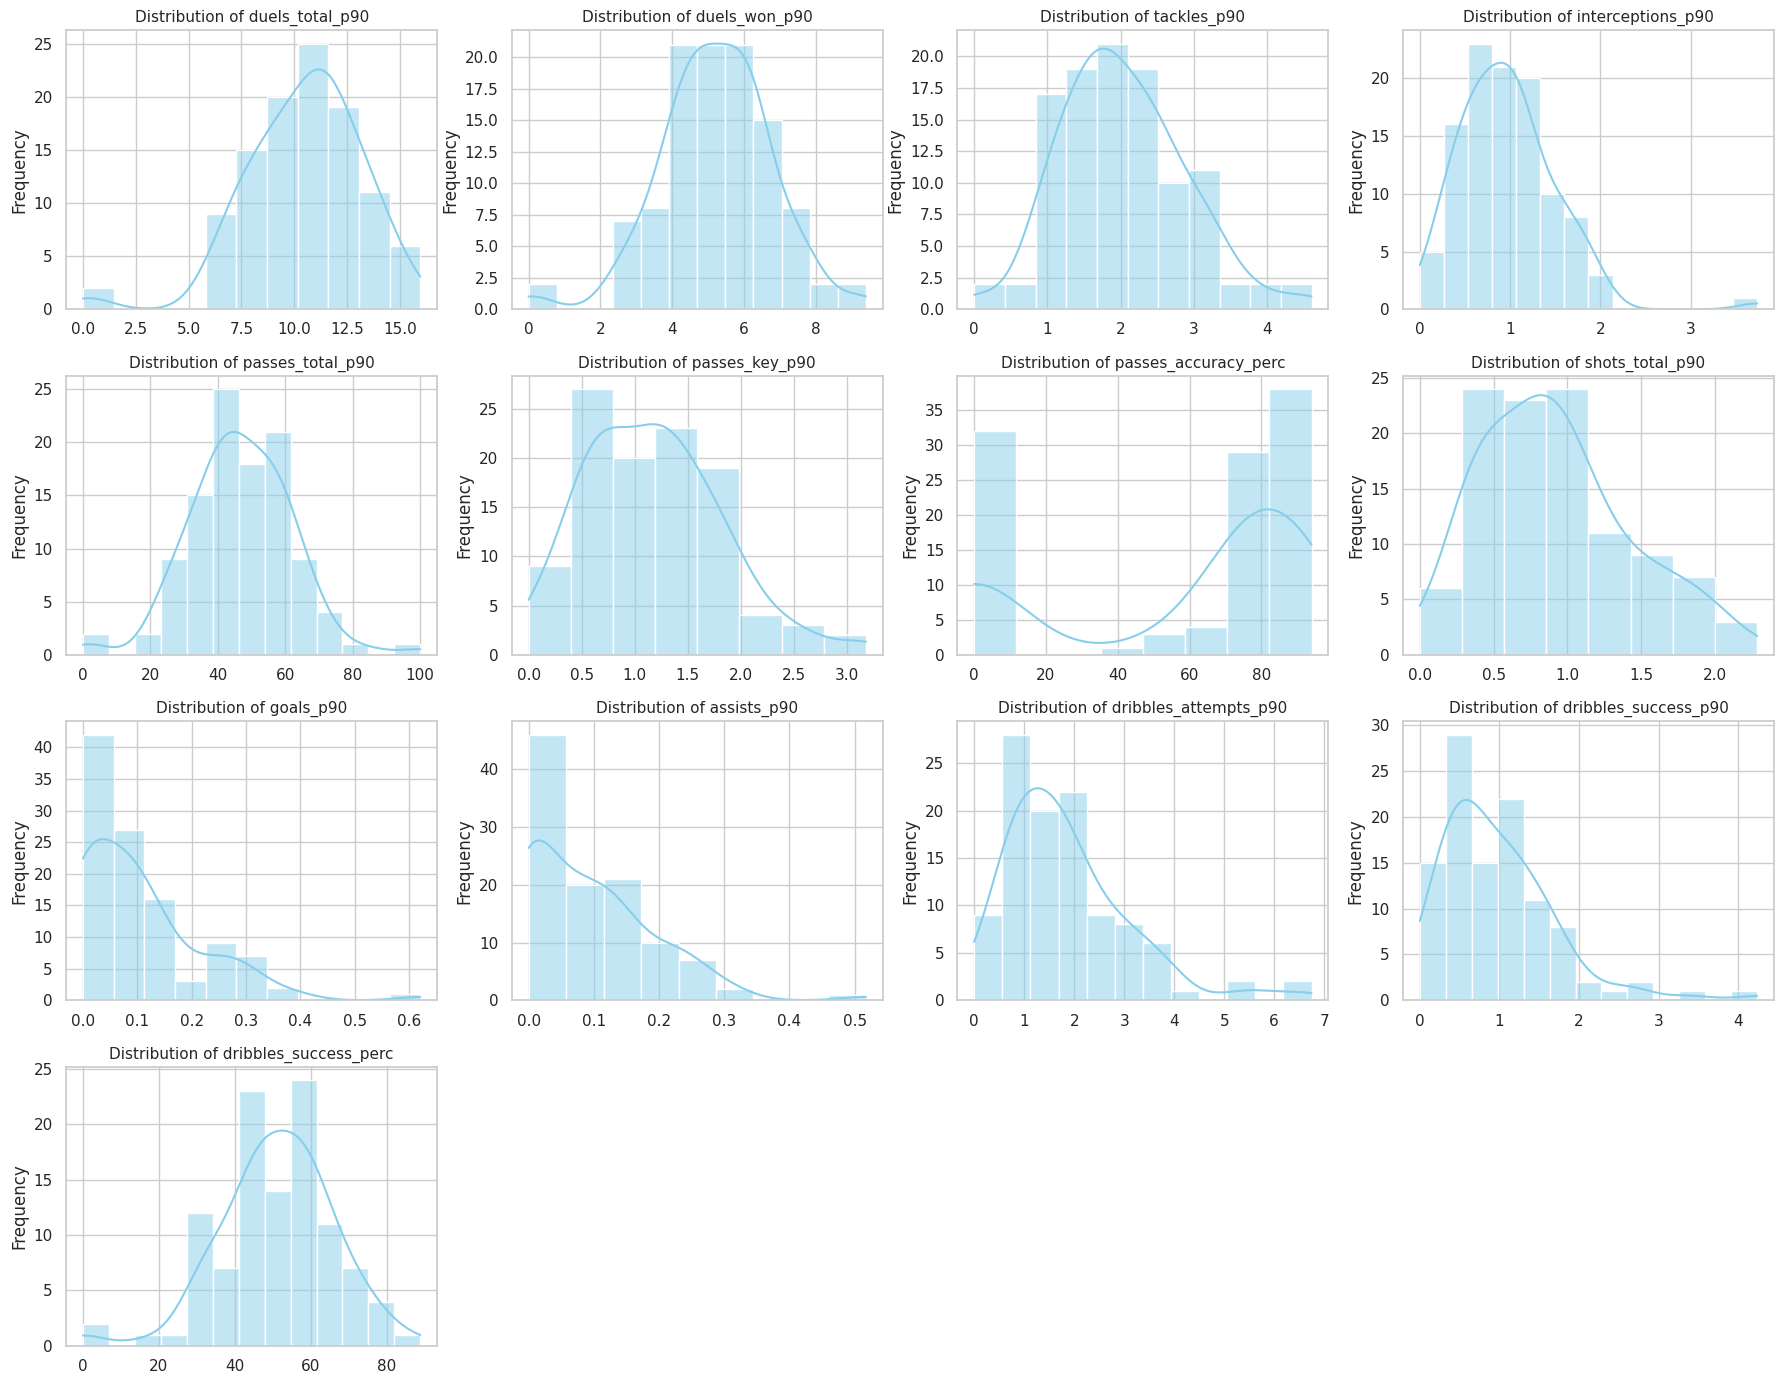

✅ Distribution plots for key midfielder metrics generated.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Setting Seaborn style for consistent visuals
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (18, 14) # Default figure size, can be adjusted

# Load the preprocessed midfielders dataset
# This file should contain the per-90 normalized and renamed columns.
try:
    df_midfielders_renamed = pd.read_csv("ligue1_midfielders_2023_24_preprocessed.csv")
    print("✅ Preprocessed midfielders dataset loaded successfully for EDA.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_midfielders_2023_24_preprocessed.csv' not found.")
    print("Please ensure the file exists (it should be generated by the previous preprocessing step).")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Selecting key per-90 and percentage features for tactical role analysis for midfielders.
# These column names match the ones defined in the 'EDA: Variable Classification & Dataset Overview - La Liga Midfielders' Canvas
# and created in the previous preprocessing step.
# Based on descriptive statistics showing zero values, 'shots_on_target_p90',
# 'shots_on_target_perc', and 'touches_total_p90' are excluded as they provide no variance.
key_features_midfielders = [
    'duels_total_p90',
    'duels_won_p90',
    'tackles_p90',
    'interceptions_p90',
    'passes_total_p90',
    'passes_key_p90',
    'passes_accuracy_perc',
    'shots_total_p90',
    'goals_p90',
    'assists_p90',
    'dribbles_attempts_p90',
    'dribbles_success_p90',
    'dribbles_success_perc',
    # 'shots_on_target_p90', # Excluded due to consistently zero values in Ligue 1 data
    # 'shots_on_target_perc', # Excluded due to consistently zero values in Ligue 1 data
    # 'touches_total_p90' # Excluded due to consistently zero values in Ligue 1 data
]

# Determine grid size dynamically based on the number of features
num_features = len(key_features_midfielders)
ncols = 4 # Number of columns in the subplot grid
nrows = (num_features + ncols - 1) // ncols # Calculate rows needed

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 4.5, nrows * 3.5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Plotting histograms with KDE overlays for each selected metric
for i, feature in enumerate(key_features_midfielders):
    if feature in df_midfielders_renamed.columns: # Check if the column exists in the DataFrame
        sns.histplot(data=df_midfielders_renamed, x=feature, kde=True, ax=axes[i], color='skyblue')
        axes[i].set_title(f"Distribution of {feature}", fontsize=11)
        axes[i].set_xlabel("") # Remove x-label to prevent overlap
        axes[i].set_ylabel("Frequency")
    else:
        print(f"Warning: Feature '{feature}' not found in the DataFrame. Skipping plot.")
        fig.delaxes(axes[i]) # Remove axis if feature is not present

# Removing any unused subplot axes (if num_features is not a perfect multiple of ncols)
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

# Optimizing spacing between plots
plt.tight_layout()
plt.show()

print("✅ Distribution plots for key midfielder metrics generated.")


#Key Takeaways from the Distribution Plots – Ligue 1 MIDFIELDERS

These visualizations provide insights into how the filtered group of Ligue 1 midfielders operate across the pitch, highlighting their contributions in defending, ball circulation, progression, and attacking output.

Defensive Actions

duels_total_p90 and duels_won_p90: Similar to La Liga, the distributions for duels in Ligue 1 show a range of engagement levels. A moderate number of midfielders participate in a moderate number of duels per 90, with a tail indicating some players are involved in a significantly higher volume, suggesting more defensively active or combative roles. The distributions for total and won duels are positively correlated.

tackles_p90 and interceptions_p90: These metrics show variations in defensive contribution through direct action and anticipation. Most Ligue 1 midfielders perform a relatively low number of tackles and interceptions per 90. However, the distributions show tails extending to higher values, identifying players who are more proactive in regaining possession through tackles and reading the game for interceptions.

Ball Circulation and Volume

passes_total_p90: This metric shows a wide range of involvement in ball circulation. While there's a concentration of players with moderate passing volumes, some midfielders register very high numbers of passes per 90, indicating roles centered around controlling possession and distributing the ball frequently. The distribution appears somewhat skewed towards lower values, with a few outliers having very high total passes.

passes_key_p90: The distribution for key passes is heavily skewed towards lower values, with most midfielders creating a small number of key passes per 90. A few players stand out with significantly higher key pass volumes, highlighting their role as primary creative outlets.

passes_accuracy_perc: The distribution of passing accuracy is relatively concentrated at higher percentages, indicating that most midfielders in this sample are quite accurate passers. There's a concentration around the higher end of the scale, with fewer players having significantly lower passing accuracy.

Attacking Contribution

shots_total_p90: The distribution for shots total per 90 is heavily skewed towards lower values. Most midfielders take a low number of shots, with a few players attempting significantly more, indicating more attack-minded roles or players who are designated set-piece takers.

goals_p90: The distribution for goals per 90 is also heavily skewed towards zero, as expected. Most midfielders score very few goals, with a small number of players having a higher goal-scoring rate, suggesting they are either more offensive midfielders or have a knack for scoring despite a deeper role.

assists_p90: Similar to goals and key passes, the distribution for assists per 90 is skewed towards lower values. Most midfielders provide few assists, with a few players demonstrating a higher volume of assists, highlighting their effectiveness in creating goal-scoring opportunities for teammates.

Ball Progression and Carrying

dribbles_attempts_p90 and dribbles_success_p90: These distributions show variation in how often midfielders attempt and successfully complete dribbles. Most midfielders attempt and complete a moderate number of dribbles, with a tail indicating players who are more active in carrying the ball forward, suggesting they are more direct or attacking midfielders. The total attempts and successful dribbles distributions are correlated.

dribbles_success_perc: The distribution for dribble success percentage shows a range, with a concentration of players having a moderate to high success rate when attempting dribbles. This indicates varying levels of effectiveness in ball carrying among the midfielders.

I am creating a heatmap to visualize correlations between tactical features

-This helps identify which stats tend to move together and which ones are independent

-Useful to understand potential clusters and avoid feature redundancy

✅ Preprocessed midfielders dataset loaded successfully for correlation heatmap.


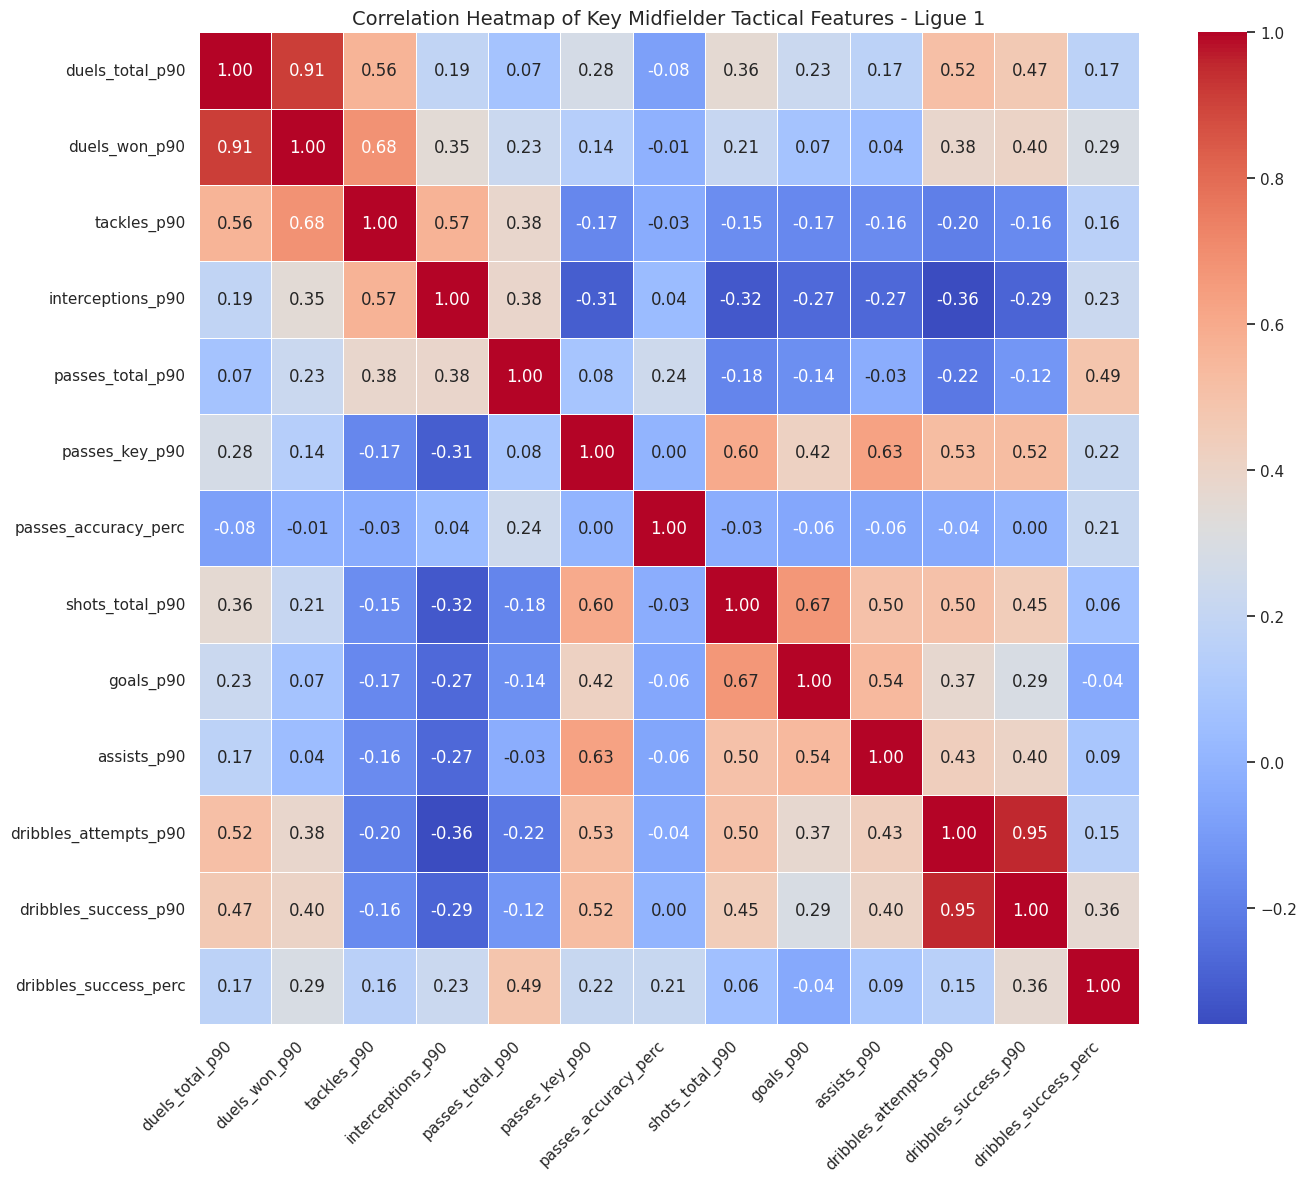


✅ Correlation heatmap generated for key midfielder metrics.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Setting Seaborn style for consistent visuals
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 10) # Adjust figure size for heatmap

# Load the preprocessed midfielders dataset
# This file should contain the per-90 normalized and renamed columns.
try:
    df_midfielders_renamed = pd.read_csv("ligue1_midfielders_2023_24_preprocessed.csv")
    print("✅ Preprocessed midfielders dataset loaded successfully for correlation heatmap.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_midfielders_2023_24_preprocessed.csv' not found.")
    print("Please ensure the file exists (it should be generated by the previous preprocessing step).")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Select the key per-90 and percentage features used in the distribution plots.
# Excluded 'shots_on_target_p90', 'shots_on_target_perc', and 'touches_total_p90' due to zero values.
key_features_midfielders = [
    'duels_total_p90',
    'duels_won_p90',
    'tackles_p90',
    'interceptions_p90',
    'passes_total_p90',
    'passes_key_p90',
    'passes_accuracy_perc',
    'shots_total_p90',
    'goals_p90',
    'assists_p90',
    'dribbles_attempts_p90',
    'dribbles_success_p90',
    'dribbles_success_perc',
]

# Create a DataFrame with only the selected key features
df_features_for_clustering = df_midfielders_renamed[key_features_midfielders].copy()

# Calculate the correlation matrix
correlation_matrix = df_features_for_clustering.corr()

# Plot the heatmap
plt.figure(figsize=(14, 12)) # Adjust figure size for heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Key Midfielder Tactical Features - Ligue 1", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

print("\n✅ Correlation heatmap generated for key midfielder metrics.")

#Interpretation of the Correlation Heatmap

The heatmap visualizes the pairwise correlations between the selected per-90 and percentage metrics for Ligue 1 midfielders. The values range from -1 (perfect negative correlation) to +1 (perfect positive correlation), with 0 indicating no correlation.

Here are some key observations:

Strong Positive Correlations:

duels_total_p90 and duels_won_p90: As expected, there is a very strong positive correlation (around 0.91) between the total number of duels a player is involved in and the number of duels they win. This suggests that players who engage in more duels also tend to win a proportional number of them.

dribbles_attempts_p90 and dribbles_success_p90: There is a very strong positive correlation (around 0.95) between the number of dribble attempts and successful dribbles. This indicates that players who attempt more dribbles also tend to complete more of them.

shots_total_p90 and goals_p90: There is a strong positive correlation (around 0.67) between the total shots taken and the goals scored. This is intuitive, as taking more shots generally leads to scoring more goals.

passes_key_p90 and assists_p90: There is a strong positive correlation (around 0.63) between key passes and assists, highlighting that players who create more chances (key passes) are also more likely to register assists.

Moderate Positive Correlations:

tackles_p90 and interceptions_p90: There is a moderate positive correlation (around 0.57) between tackles and interceptions, suggesting that players who are active in one area of defensive action also tend to be active in the other.

duels_won_p90 and tackles_p90: A moderate positive correlation (around 0.68) exists, indicating that winning duels is related to making tackles.

passes_total_p90 and passes_accuracy_perc: There is a moderate positive correlation (around 0.24) between the total number of passes and passing accuracy. While not extremely strong, it suggests that players with higher passing volume can still maintain a reasonable level of accuracy.

dribbles_success_perc and passes_total_p90: There is a moderate positive correlation (around 0.49) between dribble success percentage and total passes. This could indicate that players who are good at carrying the ball also tend to be involved in the passing game.

Negative Correlations:

interceptions_p90 and passes_key_p90: There is a moderate negative correlation (around -0.31) between interceptions and key passes. This might suggest a trade-off between being defensively positioned for interceptions and being in advanced positions to make key passes.

shots_total_p90 and interceptions_p90: There is a moderate negative correlation (around -0.32) between shots total and interceptions, which makes sense as these metrics represent opposing ends of the pitch.

Implications for Clustering:

Highly correlated features (e.g., duels_total_p90 and duels_won_p90, dribbles_attempts_p90 and dribbles_success_p90) provide similar information. Including both in clustering might overweight that particular aspect of a player's game. For clustering, it's often beneficial to select one representative feature from a highly correlated pair or consider dimensionality reduction techniques like PCA.

Features with low correlations might represent independent aspects of a midfielder's game and could be valuable for differentiating player roles.

I am plotting boxplots to detect outliers and visualize distribution spread.
This helps identify which players (or roles) stand out significantly from the average behavior.

✅ Preprocessed midfielders dataset loaded successfully for boxplot analysis.


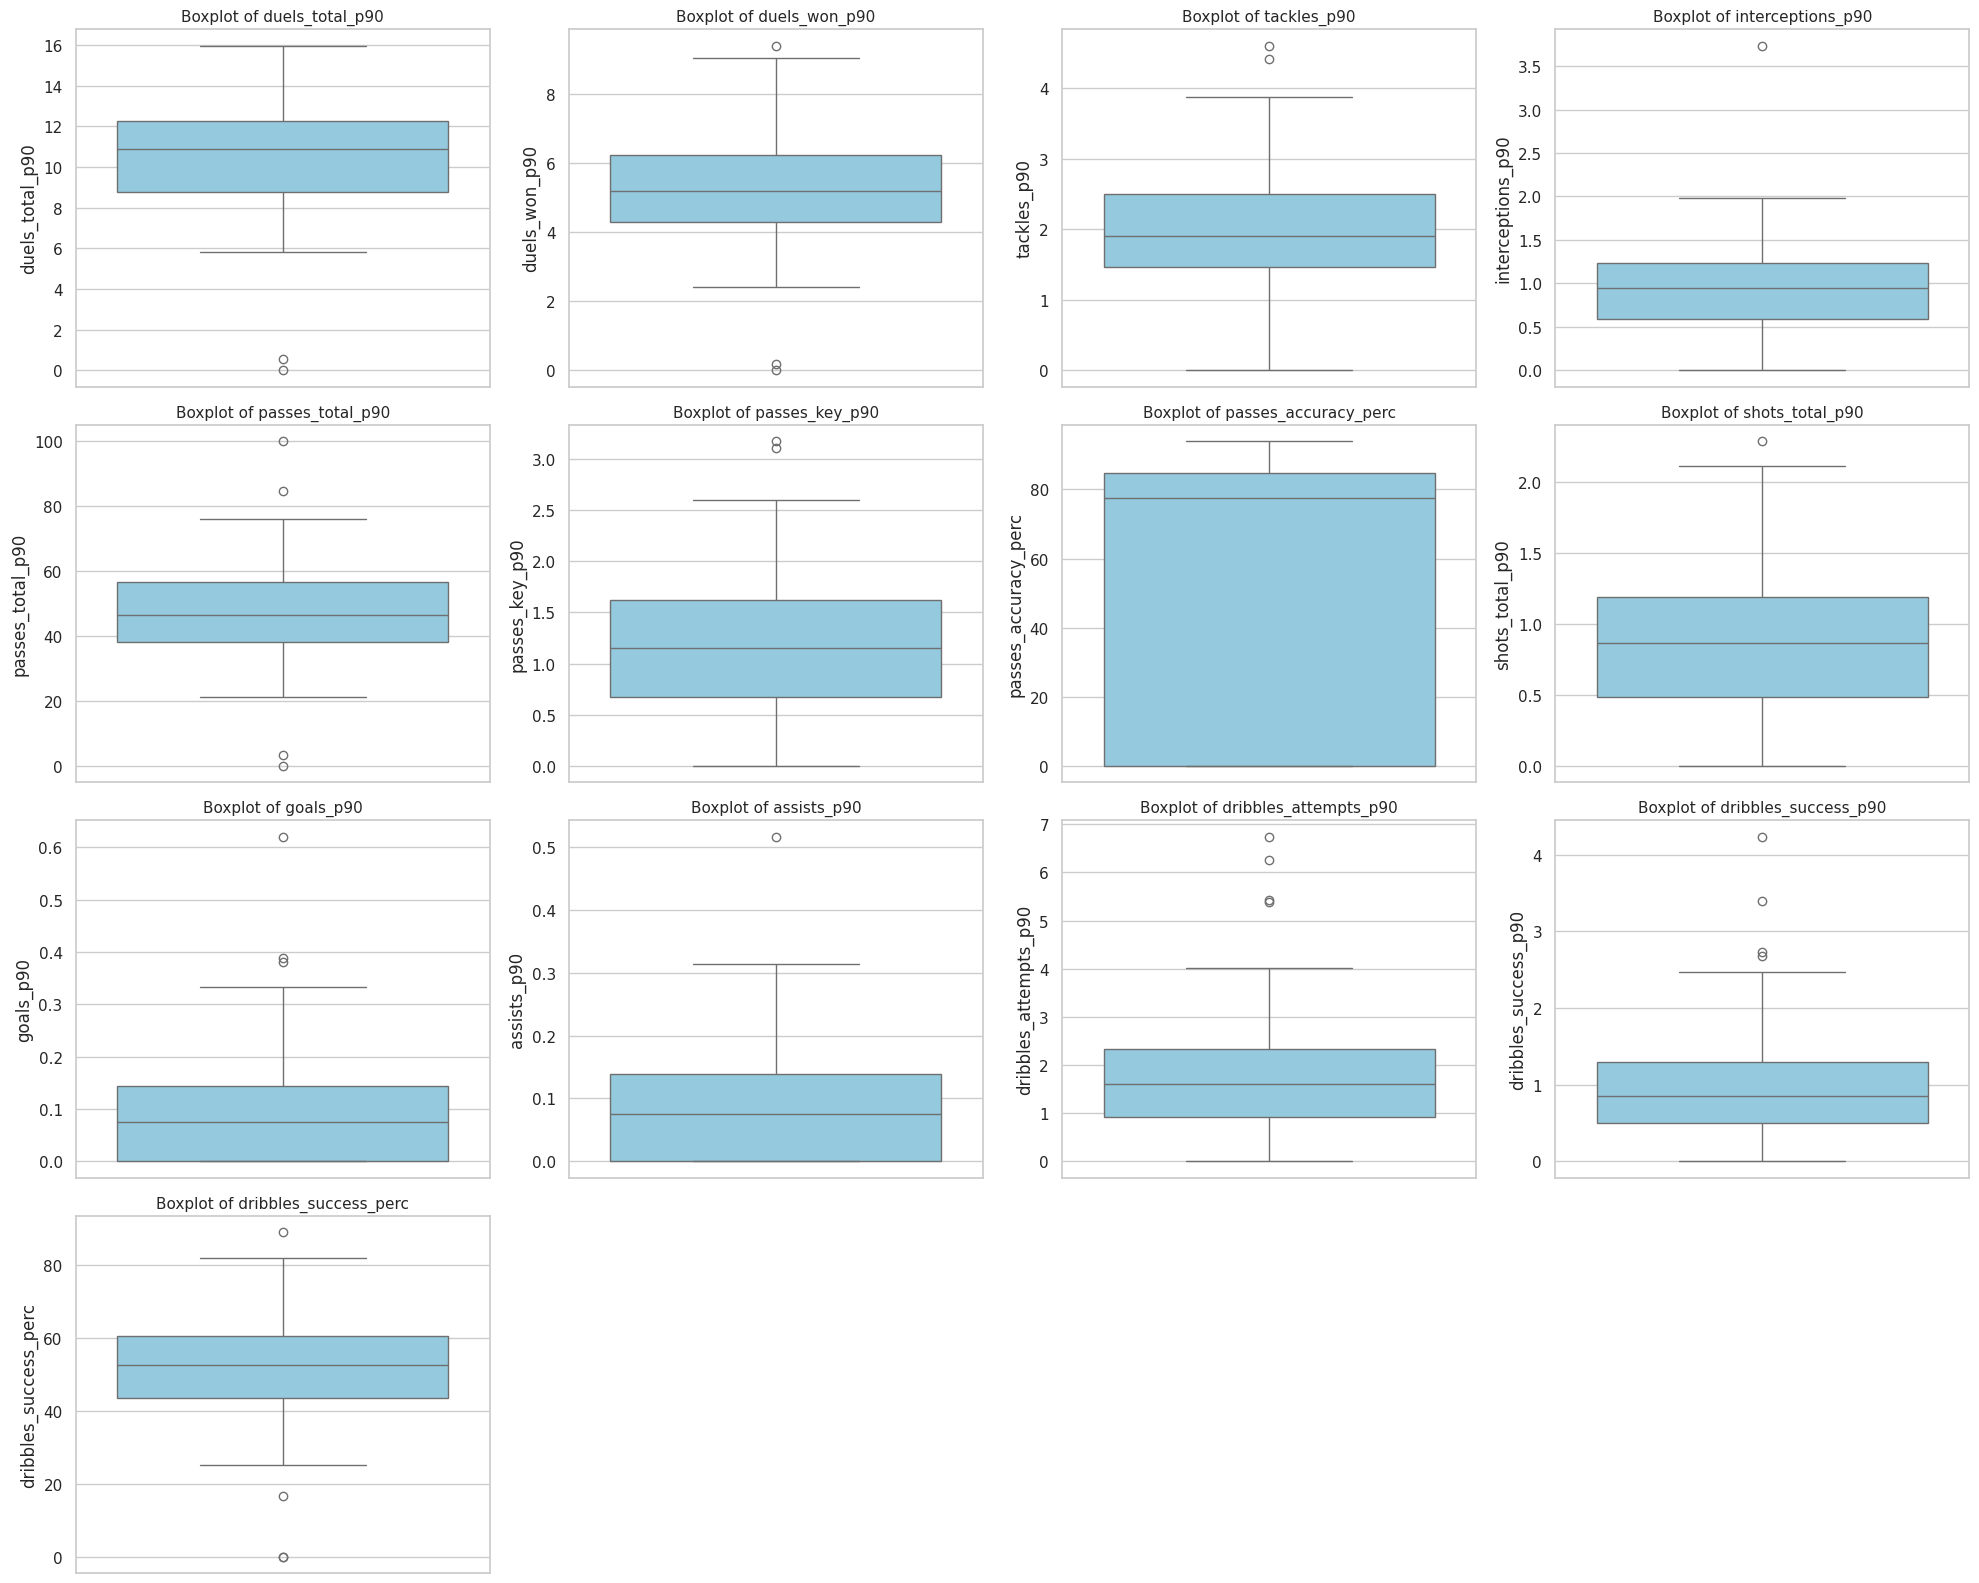

✅ Boxplots for key midfielder metrics generated.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Setting Seaborn style for consistent visuals
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (18, 14) # Default figure size, can be adjusted

# Load the preprocessed midfielders dataset
# This file should contain the per-90 normalized and renamed columns.
try:
    df_midfielders_renamed = pd.read_csv("ligue1_midfielders_2023_24_preprocessed.csv")
    print("✅ Preprocessed midfielders dataset loaded successfully for boxplot analysis.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_midfielders_2023_24_preprocessed.csv' not found.")
    print("Please ensure the file exists (it should be generated by the previous preprocessing step).")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Select the key per-90 and percentage features for tactical role analysis for midfielders.
# These are the same features used for the distribution plots and heatmap.
# Excluded 'shots_on_target_p90', 'shots_on_target_perc', and 'touches_total_p90' due to consistently zero values.
key_features_midfielders = [
    'duels_total_p90',
    'duels_won_p90',
    'tackles_p90',
    'interceptions_p90',
    'passes_total_p90',
    'passes_key_p90',
    'passes_accuracy_perc',
    'shots_total_p90',
    'goals_p90',
    'assists_p90',
    'dribbles_attempts_p90',
    'dribbles_success_p90',
    'dribbles_success_perc',
]

# Determine grid size dynamically based on the number of features
num_features = len(key_features_midfielders)
ncols = 4 # Number of columns in the subplot grid
nrows = (num_features + ncols - 1) // ncols # Calculate rows needed

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 4)) # Adjusted figsize for boxplots
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Plotting boxplots for each selected metric
for i, feature in enumerate(key_features_midfielders):
    if feature in df_midfielders_renamed.columns: # Check if the column exists in the DataFrame
        sns.boxplot(data=df_midfielders_renamed, y=feature, ax=axes[i], color='skyblue') # Use y for vertical boxplots
        axes[i].set_title(f"Boxplot of {feature}", fontsize=11)
        axes[i].set_ylabel(feature) # Set y-label to the feature name
        axes[i].set_xlabel("") # Remove x-label for clarity in vertical boxplots
    else:
        print(f"Warning: Feature '{feature}' not found in the DataFrame. Skipping plot.")
        fig.delaxes(axes[i]) # Remove axis if feature is not present

# Removing any unused subplot axes (if num_features is not a perfect multiple of ncols)
for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

# Optimizing spacing between plots
plt.tight_layout()
plt.show()

print("✅ Boxplots for key midfielder metrics generated.")

#Interpretation of the Boxplots – Ligue 1 MIDFIELDERS

The boxplots visualize the distribution and spread of the key tactical features for the filtered group of Ligue 1 midfielders (players with >= 540 minutes). The box represents the interquartile range (IQR), the line inside the box is the median, and the whiskers extend to 1.5 times the IQR from the quartiles. Points beyond the whiskers are typically considered outliers.

Here are the interpretations for each metric:

duels_total_p90 and duels_won_p90: The boxplots show a central cluster of players with moderate duel involvement and wins. There are several outliers extending towards higher values, indicating a subset of midfielders who are significantly more active in duels than the majority. The distributions are right-skewed, consistent with the histograms.

tackles_p90 and interceptions_p90: Similar to duels, most midfielders have lower values for tackles and interceptions per 90. The boxplots show a compact box for the majority, with a number of outliers representing players who excel in these defensive actions. Both distributions are right-skewed.

passes_total_p90: The boxplot for total passes per 90 shows a wider spread compared to defensive metrics, reflecting varied involvement in ball circulation. There are notable outliers with very high total passes, indicating deep-lying playmakers or central midfielders heavily involved in possession. The distribution is somewhat right-skewed.

passes_key_p90: This boxplot is heavily skewed, with the majority of midfielders having very few key passes per 90. The box is small and close to zero. There are many outliers extending to much higher values, clearly identifying the creative midfielders who are primary chance creators.

passes_accuracy_perc: The boxplot shows that most midfielders have a relatively high passing accuracy percentage, with the box positioned towards the upper end of the scale. There are some outliers with lower accuracy percentages, suggesting players who might attempt more difficult passes or are less precise. The distribution appears somewhat left-skewed (concentration at higher values).

shots_total_p90: Similar to key passes, the boxplot for shots total per 90 is heavily skewed towards lower values. The majority of midfielders take few shots. Outliers with significantly higher shot volumes represent more attacking midfielders or those with set-piece responsibilities.

goals_p90: The boxplot for goals per 90 is highly skewed, with most players scoring very few goals. The outliers with higher goal rates highlight the small number of midfielders who provide a significant goal threat.

assists_p90: The boxplot for assists per 90 is also skewed towards zero. Most midfielders have a low number of assists, with outliers representing players who are particularly effective at setting up goals.

dribbles_attempts_p90 and dribbles_success_p90: These boxplots show that most midfielders attempt and complete a moderate number of dribbles. There are outliers with considerably higher numbers, indicating players who are frequent ball carriers and successful dribblers. The distributions are right-skewed.

dribbles_success_perc: The boxplot for dribble success percentage shows a range of effectiveness when dribbling. While there's a central tendency, there are outliers on both the lower and higher ends, indicating players who are either less effective or exceptionally good at completing dribbles.
Key Observations regarding Outliers:

The boxplots clearly show the presence of outliers in many of the per-90 and percentage metrics, particularly in attacking and creative statistics (passes_key_p90, shots_total_p90, goals_p90, assists_p90, dribbles_attempts_p90, dribbles_success_p90). These outliers are important as they represent players with distinct skill sets that differentiate them from the average midfielder and will likely be crucial in forming distinct clusters. Metrics like passes_accuracy_perc show fewer extreme outliers.

#3.1 Data Cleaning-LIGUE 1 MIDFIELDERS

This part ensures my dataset is clean, consistent, and ready for clustering. I’ll go through key checks.



In [ ]:
import pandas as pd

# Load the preprocessed midfielders dataset

try:
    df_midfielders_renamed = pd.read_csv("ligue1_midfielders_2023_24_preprocessed.csv")
    print("✅ Preprocessed Ligue 1 midfielders dataset loaded successfully for data type check.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_midfielders_2023_24_preprocessed.csv' not found.")
    print("Please ensure the file exists (it should be generated by the 'Normalize and Rename Ligue 1 Midfielders Data' step).")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Checking data types to make sure all features are interpreted correctly
# Using df_midfielders_renamed, which is the final preprocessed DataFrame
print("\nData types of the preprocessed Ligue 1 midfielders dataset:")
print(df_midfielders_renamed.dtypes)



✅ Preprocessed Ligue 1 midfielders dataset loaded successfully for data type check.

Data types of the preprocessed Ligue 1 midfielders dataset:
name                        object
team                        object
position                    object
minutes                    float64
duels_total_api            float64
duels_won_api              float64
goals_total_api            float64
shots_total_api            float64
shots_on_target_api          int64
assists_total_api          float64
dribbles_attempts_api      float64
dribbles_success_api       float64
touches_total_api            int64
passes_key_api             float64
passes_total_api           float64
passes_accuracy_perc       float64
tackles_total_api          float64
interceptions_total_api    float64
shots_on_target_perc       float64
dribbles_success_perc      float64
name_clean                  object
team_clean                  object
duels_total_p90            float64
duels_won_p90              float64
goals_p90      

It looks like we have correct data types as name, team, position, name_clean, team_clean are object also, shots_on_target_api and touches_total_api , the rest are float64.

In [ ]:
import pandas as pd

# Load the preprocessed midfielders dataset

try:
    df_midfielders_renamed = pd.read_csv("ligue1_midfielders_2023_24_preprocessed.csv")
    print("✅ Preprocessed Ligue 1 midfielders dataset loaded successfully for duplicate check.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_midfielders_2023_24_preprocessed.csv' not found.")
    print("Please ensure the file exists (it should be generated by the previous preprocessing step).")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Checking for duplicated rows in the preprocessed DataFrame
# Using df_midfielders_renamed, which is the final preprocessed DataFrame
num_duplicates = df_midfielders_renamed.duplicated().sum()

print(f"\nNumber of duplicated rows in the preprocessed Ligue 1 midfielders dataset: {num_duplicates}")

if num_duplicates == 0:
    print("✅ No duplicate rows found. The dataset is ready for further analysis.")
else:
    print("⚠️ Duplicate rows found. Consider investigating and removing them if they are unintended.")
    # Optional: Display duplicated rows if any
    # print("\nDuplicated Rows:")
    # print(df_midfielders_renamed[df_midfielders_renamed.duplicated(keep=False)].to_string())


✅ Preprocessed Ligue 1 midfielders dataset loaded successfully for duplicate check.

Number of duplicated rows in the preprocessed Ligue 1 midfielders dataset: 0
✅ No duplicate rows found. The dataset is ready for further analysis.


O duplicates

In [ ]:
import pandas as pd

# Load the preprocessed midfielders dataset

try:
    df_midfielders_renamed = pd.read_csv("ligue1_midfielders_2023_24_preprocessed.csv")
    print("✅ Preprocessed Ligue 1 midfielders dataset loaded successfully for unique value check.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_midfielders_2023_24_preprocessed.csv' not found.")
    print("Please ensure the file exists (it should be generated by the previous preprocessing step).")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Checking unique values in player name and team from the preprocessed DataFrame
# Using df_midfielders_renamed, which contains the final set of players and renamed columns.
print("\nUnique player names in the preprocessed Ligue 1 midfielders dataset:", df_midfielders_renamed['name'].nunique())
print("Unique teams in the preprocessed Ligue 1 midfielders dataset:", df_midfielders_renamed['team'].nunique())


✅ Preprocessed Ligue 1 midfielders dataset loaded successfully for unique value check.

Unique player names in the preprocessed Ligue 1 midfielders dataset: 106
Unique teams in the preprocessed Ligue 1 midfielders dataset: 18


In [ ]:
import pandas as pd

# Load the preprocessed midfielders dataset

try:
    df_midfielders_renamed = pd.read_csv("ligue1_midfielders_2023_24_preprocessed.csv")
    print("✅ Preprocessed Ligue 1 midfielders dataset loaded successfully for final missing value check.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_midfielders_2023_24_preprocessed.csv' not found.")
    print("Please ensure the file exists (it should be generated by the previous preprocessing step).")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Checking for missing values in the preprocessed dataset
# Using df_midfielders_renamed, which is the final preprocessed DataFrame
missing_values_final = df_midfielders_renamed.isnull().sum()
missing_values_summary = missing_values_final[missing_values_final > 0].sort_values(ascending=False)

if missing_values_summary.empty:
    print("\n✅ No missing values found in the preprocessed Ligue 1 midfielders dataset. Data is clean!")
else:
    print("\n⚠️ Missing values found in the preprocessed Ligue 1 midfielders dataset (should be 0 after cleaning):")
    print(missing_values_summary.to_string())
    print("\nThis indicates an issue in previous cleaning steps. Please review and re-run them.")


✅ Preprocessed Ligue 1 midfielders dataset loaded successfully for final missing value check.

✅ No missing values found in the preprocessed Ligue 1 midfielders dataset. Data is clean!


In [ ]:
import pandas as pd

# Load the preprocessed Ligue 1 midfielders dataset, which contains all per-90 and renamed metrics.
# This is the source for selecting the features that will be used for clustering.
try:
    df_midfielders_preprocessed = pd.read_csv("ligue1_midfielders_2023_24_preprocessed.csv")
    print("✅ Preprocessed Ligue 1 midfielders dataset loaded successfully for feature selection.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_midfielders_2023_24_preprocessed.csv' not found.")
    print("Please ensure this file has been generated by the 'Normalize and Rename Ligue 1 Midfielders Data' step.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Define the list of numerical features to be used for clustering for midfielders.
# These are the per-90 and percentage metrics identified as relevant for tactical role analysis.
# Based on the descriptive statistics output for Ligue 1, 'shots_on_target_p90',
# 'shots_on_target_perc', and 'touches_total_p90' are excluded as they show consistently
# zero values, making them non-discriminatory for clustering.
selected_metrics_for_clustering = [
    'duels_total_p90',
    'duels_won_p90',
    'tackles_p90',
    'interceptions_p90',
    'passes_total_p90',
    'passes_key_p90',
    'passes_accuracy_perc',
    'shots_total_p90',
    'goals_p90',
    'assists_p90',
    'dribbles_attempts_p90',
    'dribbles_success_p90',
    'dribbles_success_perc',
    # 'shots_on_target_p90', # Excluded due to consistently zero values in Ligue 1 data
    # 'shots_on_target_perc', # Excluded due to consistently zero values in Ligue 1 data
    # 'touches_total_p90' # Excluded due to consistently zero values in Ligue 1 data
]

# Filter the DataFrame to include only the selected metrics for clustering.
# This creates the final dataset that will be fed into the clustering algorithms.

existing_selected_metrics = [col for col in selected_metrics_for_clustering if col in df_midfielders_preprocessed.columns]

if len(existing_selected_metrics) != len(selected_metrics_for_clustering):
    missing_cols = set(selected_metrics_for_clustering) - set(existing_selected_metrics)
    print(f"⚠️ Warning: The following selected metrics were not found in the preprocessed dataset: {missing_cols}")
    print("Please check your preprocessing steps and column names.")

df_features_for_clustering = df_midfielders_preprocessed[existing_selected_metrics].copy()
print(f"✅ Selected {len(existing_selected_metrics)} features for clustering.")


# Save the dataset with only the selected metrics for clustering.
# This ensures that subsequent steps can easily load the correct feature set.
output_filename = "ligue1_midfielders_2023_24_selected_metrics.csv"
df_features_for_clustering.to_csv(output_filename, index=False)
print(f"✅ Selected features dataset saved as: {output_filename}")


# Display summary information about the newly created dataset for clustering.
print("\n--- Summary of Features for Clustering ---")
print(f"Final dataset shape: {df_features_for_clustering.shape}")
print("\nColumn types:")
print(df_features_for_clustering.dtypes.value_counts())
print("\nFirst 5 rows of the features for clustering:")
print(df_features_for_clustering.head().to_string())


✅ Preprocessed Ligue 1 midfielders dataset loaded successfully for feature selection.
✅ Selected 13 features for clustering.
✅ Selected features dataset saved as: ligue1_midfielders_2023_24_selected_metrics.csv

--- Summary of Features for Clustering ---
Final dataset shape: (107, 13)

Column types:
float64    13
Name: count, dtype: int64

First 5 rows of the features for clustering:
   duels_total_p90  duels_won_p90  tackles_p90  interceptions_p90  passes_total_p90  passes_key_p90  passes_accuracy_perc  shots_total_p90  goals_p90  assists_p90  dribbles_attempts_p90  dribbles_success_p90  dribbles_success_perc
0         7.323689       3.580470     1.139241           1.627486         23.598553        0.162749                   0.0         0.325497   0.000000     0.000000               0.488246              0.162749              33.333333
1        12.041284       5.917431     3.233945           1.376147         52.912844        0.481651                  86.3         0.756881   0.068807  

#4.1 FEATURE ENGINEERING- LIGUE 1 MIDFIELDERS

#One-hot encoding

This step is crucial for preparing the 'team' categorical variable for machine learning. By converting team names into a numerical, binary format through one-hot encoding, I ensure that the clustering algorithm can properly interpret and utilize team affiliation as a factor in grouping players, maintaining consistency with the approach taken for other positions like midfielders.

In [ ]:
import pandas as pd

# Load the preprocessed midfielders dataset, which still contains the original 'team' column.
# This is the starting point for one-hot encoding.
try:
    df_midfielders_preprocessed = pd.read_csv("ligue1_midfielders_2023_24_preprocessed.csv")
    print("✅ Preprocessed Ligue 1 midfielders dataset loaded successfully for one-hot encoding.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_midfielders_2023_24_preprocessed.csv' not found.")
    print("Please ensure this file has been generated by the 'Normalize and Rename Ligue 1 Midfielders Data' step.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Perform one-hot encoding on the 'team' column.
# 'drop_first=True' is used to avoid multicollinearity.
# The new columns will be named 'team_TeamName'.
df_midfielders_preprocessed_encoded_team = pd.get_dummies(df_midfielders_preprocessed, columns=['team'], drop_first=True)
print("✅ 'team' column successfully one-hot encoded.")

# This checks if the original 'team' column was successfully removed by get_dummies.
if 'team' in df_midfielders_preprocessed_encoded_team.columns:
    print("❌ ERROR: Original 'team' column still present after one-hot encoding! This should not happen.")
    print("Please investigate why pd.get_dummies did not remove the original 'team' column.")
    # If the original 'team' column persists, explicitly drop it here to proceed.
    df_midfielders_preprocessed_encoded_team.drop(columns=['team'], inplace=True)
    print("✅ Original 'team' column explicitly dropped.")
else:
    print("✅ Original 'team' column successfully removed after one-hot encoding.")


# Save the DataFrame with the new encoded team columns to a new CSV file.
# This file will then be used as input for the 'Feature Selection for Clustering' step.
output_filename = "ligue1_midfielders_2023_24_preprocessed_encoded_team.csv"
df_midfielders_preprocessed_encoded_team.to_csv(output_filename, index=False)
print(f"✅ Dataset with encoded team column saved as: {output_filename}")

# Display the first few rows and columns to verify
print("\nFirst 5 rows of the dataset after one-hot encoding 'team':")
print(df_midfielders_preprocessed_encoded_team.head().to_string())
print("\nColumns after one-hot encoding 'team':")
print(df_midfielders_preprocessed_encoded_team.columns.tolist())


✅ Preprocessed Ligue 1 midfielders dataset loaded successfully for one-hot encoding.
✅ 'team' column successfully one-hot encoded.
✅ Original 'team' column successfully removed after one-hot encoding.
✅ Dataset with encoded team column saved as: ligue1_midfielders_2023_24_preprocessed_encoded_team.csv

First 5 rows of the dataset after one-hot encoding 'team':
            name    position  minutes  duels_total_api  duels_won_api  goals_total_api  shots_total_api  shots_on_target_api  assists_total_api  dribbles_attempts_api  dribbles_success_api  touches_total_api  passes_key_api  passes_total_api  passes_accuracy_perc  tackles_total_api  interceptions_total_api  shots_on_target_perc  dribbles_success_perc           name_clean     team_clean  duels_total_p90  duels_won_p90  goals_p90  shots_total_p90  shots_on_target_p90  assists_p90  dribbles_attempts_p90  dribbles_success_p90  touches_total_p90  passes_key_p90  passes_total_p90  tackles_p90  interceptions_p90  team_Le Havre  team_Len

#4.2 Standard Scaling of Numerical Features

Before applying clustering, we need to make sure all numerical features contribute equally. Some metrics are much larger in range than others , which can distort clustering results. I solve this using StandardScaler, which transforms each feature to have:

    Mean = 0

    Standard deviation = 1

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset containing the preprocessed data with one-hot encoded team columns.
# This is the input for the scaling process.
try:
    df_features_to_scale = pd.read_csv("ligue1_midfielders_2023_24_preprocessed_encoded_team.csv")
    print("✅ Preprocessed Ligue 1 midfielders dataset (with encoded teams) loaded successfully for scaling.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_midfielders_2023_24_preprocessed_encoded_team.csv' not found.")
    print("Please ensure this file has been generated by the 'Feature Engineering: One-Hot Encoding Team Column for Midfielders' step.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Identify numerical columns to be scaled.
# This should include all per-90 metrics, percentage metrics, and one-hot encoded team columns.
# Exclude identifier columns like 'name', 'position', 'name_clean', 'team_clean', and 'minutes'
# as they are not features for clustering and should not be scaled.
# Also, explicitly exclude columns identified as having all zero values (or very low variance)
# as requested by the user, as these would not contribute meaningfully to clustering.
columns_to_exclude_from_scaling = [
    'name', 'position', 'minutes', 'name_clean', 'team_clean',
    # Original API total columns are also excluded as we use their _p90 versions or percentages
    'duels_total_api', 'duels_won_api', 'goals_total_api', 'shots_total_api',
    'shots_on_target_api', 'assists_total_api', 'dribbles_attempts_api',
    'dribbles_success_api', 'touches_total_api', 'passes_key_api', 'passes_total_api',
    'tackles_total_api', 'interceptions_total_api',
    # NEW: Exclude columns with constant zero values (or very low variance) as identified in Ligue 1 data
    'shots_on_target_perc',
    'shots_on_target_p90',
    'touches_total_p90'
]

# Filter out columns that don't exist in the DataFrame to prevent errors
existing_cols_to_exclude = [col for col in columns_to_exclude_from_scaling if col in df_features_to_scale.columns]

# Create a DataFrame containing only the features that need to be scaled.
# This will include all the per-90 metrics, percentage metrics, and one-hot encoded team columns,
# *excluding* the ones identified for removal.
df_numerical_features = df_features_to_scale.drop(columns=existing_cols_to_exclude, errors='ignore').copy()

# Initialize the StandardScaler.
# StandardScaler will transform the data such that each feature has a mean of 0 and a standard deviation of 1.
# This is crucial for distance-based clustering algorithms like K-Means.
scaler = StandardScaler()

# Fit the scaler to the data and transform it.
# The .fit_transform() method calculates the mean and standard deviation for each feature
# and then applies the transformation. The output is a NumPy array.
scaled_features_array = scaler.fit_transform(df_numerical_features)

# Convert the scaled NumPy array back into a Pandas DataFrame.
# It's important to retain the original column names for interpretability.
df_scaled_features = pd.DataFrame(scaled_features_array, columns=df_numerical_features.columns)
print("✅ Numerical features successfully scaled using StandardScaler.")

# Save the scaled features to a new CSV file.
# This file will be the direct input for the clustering algorithms.
output_filename = "ligue1_midfielders_2023_24_scaled_metrics.csv"
df_scaled_features.to_csv(output_filename, index=False)
print(f"✅ Scaled features dataset saved as: {output_filename}")

# Display summary information about the scaled dataset.
print("\n--- Summary of Scaled Features for Midfielders ---")
print(f"Scaled dataset shape: {df_scaled_features.shape}")
print("\nColumn types (should all be float64):")
print(df_scaled_features.dtypes.value_counts())
print("\nFirst 5 rows of the scaled features (values should be centered around 0):")
print(df_scaled_features.head().to_string())


✅ Preprocessed Ligue 1 midfielders dataset (with encoded teams) loaded successfully for scaling.
✅ Numerical features successfully scaled using StandardScaler.
✅ Scaled features dataset saved as: ligue1_midfielders_2023_24_scaled_metrics.csv

--- Summary of Scaled Features for Midfielders ---
Scaled dataset shape: (107, 30)

Column types (should all be float64):
float64    30
Name: count, dtype: int64

First 5 rows of the scaled features (values should be centered around 0):
   passes_accuracy_perc  dribbles_success_perc  duels_total_p90  duels_won_p90  goals_p90  shots_total_p90  assists_p90  dribbles_attempts_p90  dribbles_success_p90  passes_key_p90  passes_total_p90  tackles_p90  interceptions_p90  team_Le Havre  team_Lens  team_Lille  team_Lorient  team_Lyon  team_Marseille  team_Metz  team_Monaco  team_Montpellier  team_Nantes  team_Nice  team_Paris Saint Germain  team_Reims  team_Rennes  team_Stade Brestois 29  team_Strasbourg  team_Toulouse
0             -1.496138              

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset containing the preprocessed data with one-hot encoded team columns.
# This is the input for the scaling process.
try:
    df_features_to_scale = pd.read_csv("ligue1_midfielders_2023_24_preprocessed_encoded_team.csv")
    print("✅ Preprocessed Ligue 1 midfielders dataset (with encoded teams) loaded successfully for scaling.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_midfielders_2023_24_preprocessed_encoded_team.csv' not found.")
    print("Please ensure this file has been generated by the 'Feature Engineering: One-Hot Encoding Team Column for Midfielders' step.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Identify numerical columns to be scaled.
# This should include all per-90 metrics, percentage metrics, and one-hot encoded team columns.
# Exclude identifier columns like 'name', 'position', 'name_clean', 'team_clean', and 'minutes'
# as they are not features for clustering and should not be scaled.
# Also, explicitly exclude columns identified as having all zero values (or very low variance)
# as requested by the user, as these would not contribute meaningfully to clustering.
columns_to_exclude_from_scaling = [
    'name', 'position', 'minutes', 'name_clean', 'team_clean',
    # Original API total columns are also excluded as we use their _p90 versions or percentages
    'duels_total_api', 'duels_won_api', 'goals_total_api', 'shots_total_api',
    'shots_on_target_api', 'assists_total_api', 'dribbles_attempts_api',
    'dribbles_success_api', 'touches_total_api', 'passes_key_api', 'passes_total_api',
    'tackles_total_api', 'interceptions_total_api',
    # NEW: Exclude columns with constant zero values (or very low variance) as identified in Ligue 1 data
    'shots_on_target_perc',
    'shots_on_target_p90',
    'touches_total_p90'
]

# Filter out columns that don't exist in the DataFrame to prevent errors
existing_cols_to_exclude = [col for col in columns_to_exclude_from_scaling if col in df_features_to_scale.columns]

# Create a DataFrame containing only the features that need to be scaled.
# This will include all the per-90 metrics, percentage metrics, and one-hot encoded team columns,
# *excluding* the ones identified for removal.
df_numerical_features = df_features_to_scale.drop(columns=existing_cols_to_exclude, errors='ignore').copy()

# Initialize the StandardScaler.
# StandardScaler will transform the data such that each feature has a mean of 0 and a standard deviation of 1.
# This is crucial for distance-based clustering algorithms like K-Means.
scaler = StandardScaler()

# Fit the scaler to the data and transform it.
# The .fit_transform() method calculates the mean and standard deviation for each feature
# and then applies the transformation. The output is a NumPy array.
scaled_features_array = scaler.fit_transform(df_numerical_features)

# Convert the scaled NumPy array back into a Pandas DataFrame.
# It's important to retain the original column names for interpretability.
df_scaled_features = pd.DataFrame(scaled_features_array, columns=df_numerical_features.columns)
print("✅ Numerical features successfully scaled using StandardScaler.")

# Save the scaled features to a new CSV file.
# This file will be the direct input for the clustering algorithms.
output_filename = "ligue1_midfielders_2023_24_scaled_metrics.csv"
df_scaled_features.to_csv(output_filename, index=False)
print(f"✅ Scaled features dataset saved as: {output_filename}")

# Display summary information about the scaled dataset.
print("\n--- Summary of Scaled Features for Midfielders ---")
print(f"Scaled dataset shape: {df_scaled_features.shape}")
print("\nColumn types (should all be float64):")
print(df_scaled_features.dtypes.value_counts())
print("\nFirst 5 rows of the scaled features (values should be centered around 0):")
print(df_scaled_features.head().to_string())


✅ Preprocessed Ligue 1 midfielders dataset (with encoded teams) loaded successfully for scaling.
✅ Numerical features successfully scaled using StandardScaler.
✅ Scaled features dataset saved as: ligue1_midfielders_2023_24_scaled_metrics.csv

--- Summary of Scaled Features for Midfielders ---
Scaled dataset shape: (107, 30)

Column types (should all be float64):
float64    30
Name: count, dtype: int64

First 5 rows of the scaled features (values should be centered around 0):
   passes_accuracy_perc  dribbles_success_perc  duels_total_p90  duels_won_p90  goals_p90  shots_total_p90  assists_p90  dribbles_attempts_p90  dribbles_success_p90  passes_key_p90  passes_total_p90  tackles_p90  interceptions_p90  team_Le Havre  team_Lens  team_Lille  team_Lorient  team_Lyon  team_Marseille  team_Metz  team_Monaco  team_Montpellier  team_Nantes  team_Nice  team_Paris Saint Germain  team_Reims  team_Rennes  team_Stade Brestois 29  team_Strasbourg  team_Toulouse
0             -1.496138              

#4.3 Final feature selection-LIGUE 1 MIDFIELDERS

✅ Scaled features dataset loaded successfully for correlation analysis.


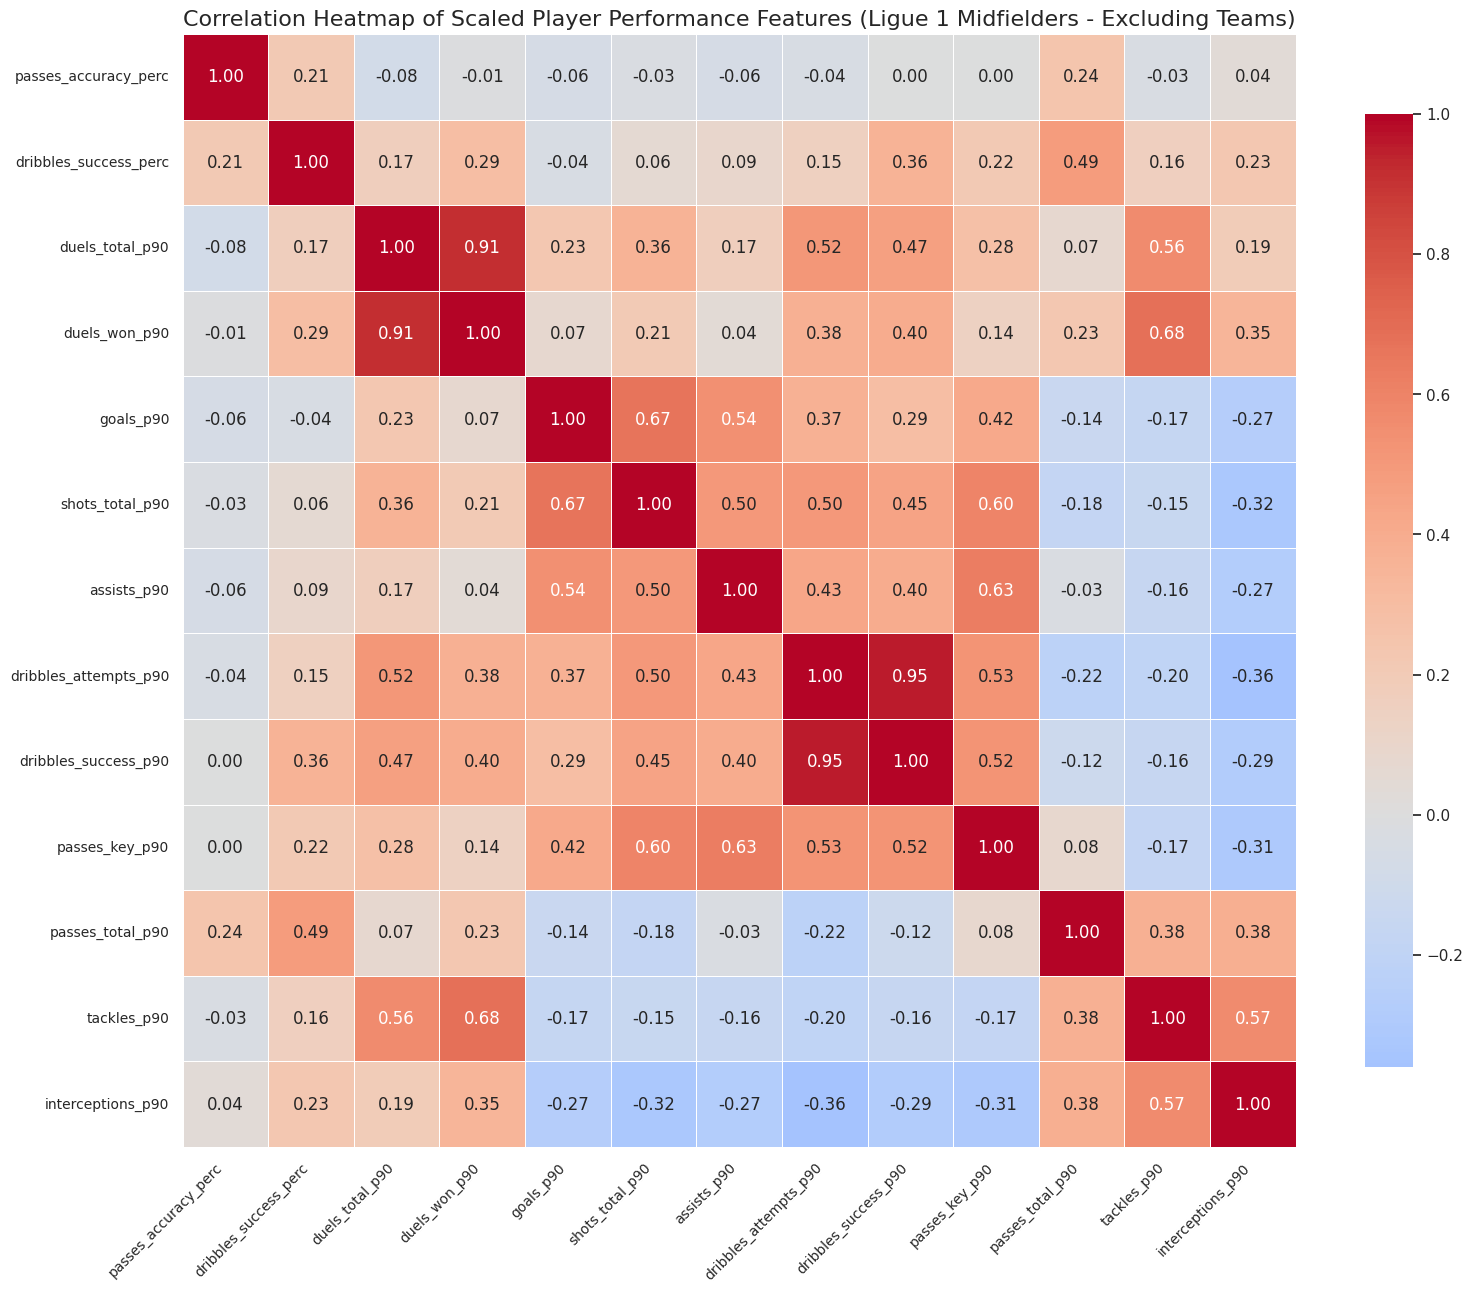

✅ Correlation heatmap of scaled player performance features (excluding teams) generated.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Explanation:
# This heatmap visualizes the correlations among the numerical features
# that have been selected and scaled for the clustering analysis.
# Analyzing these correlations helps identify highly redundant features
# before applying clustering algorithms, which can sometimes be sensitive
# to multicollinearity. It also provides insights into relationships
# between player metrics.
# Note: One-hot encoded team columns are excluded from this visualization
# to improve readability and focus on player performance metric correlations.

# Load the scaled features dataset.
# This file contains all the numerical metrics, including one-hot encoded team columns,
# that will be used as input for clustering.
try:
    df_scaled_features = pd.read_csv("ligue1_midfielders_2023_24_scaled_metrics.csv")
    print("✅ Scaled features dataset loaded successfully for correlation analysis.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_midfielders_2023_24_scaled_metrics.csv' not found.")
    print("Please ensure this file has been generated by the 'Feature Scaling: Standardizing Numerical Metrics for Midfielders' step.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Filter out the one-hot encoded 'team_' columns for this visualization.
# The actual clustering will still use all features, including team.
# This step is purely for visual clarity of the heatmap.
clustering_features_for_heatmap = [
    col for col in df_scaled_features.columns if not col.startswith('team_')
]

# Computing correlation matrix
# Using only the selected player performance features for the heatmap
corr_matrix = df_scaled_features[clustering_features_for_heatmap].corr()

# Plotting correlation heatmap
plt.figure(figsize=(16, 14)) # Adjusted figure size for better readability
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": .75} # Shrink color bar to fit better
)
plt.title("Correlation Heatmap of Scaled Player Performance Features (Ligue 1 Midfielders - Excluding Teams)", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10) # Adjust rotation for better fit
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

print("✅ Correlation heatmap of scaled player performance features (excluding teams) generated.")


#Explanation of Metric Selection Based on Correlation Heatmap (Midfielders)

The heatmap above reveals patterns of correlation between key scaled midfielder metrics. Based on these relationships, we can make informed selections to retain features that are informative, tactically relevant, and not overly redundant for clustering.

Key Observations and Metric Selection Rationale:

Defensive Duels and Tackles:

duels_total_p90 and duels_won_p90 are highly correlated (around 0.91).

tackles_p90 and interceptions_p90 show a moderate positive correlation (around 0.57).

duels_total_p90/duels_won_p90 also correlate moderately with tackles_p90 (around 0.56/0.68).

Selection:

We retain a set of these features to capture different aspects of defensive engagement and success (e.g., duels_total_p90, duels_won_p90, tackles_p90, interceptions_p90) as they represent distinct but related defensive actions. While duels_total_p90 and duels_won_p90 are highly correlated, retaining both can sometimes provide a slightly more nuanced view of duel effectiveness.

Passing Volume and Accuracy:

passes_total_p90 shows low to moderate correlations with most defensive metrics.

passes_key_p90 has low correlations with defensive metrics but moderate positive correlations with passes_total_p90 (around 0.08) and assists_p90 (around 0.63).

passes_accuracy_perc shows low correlations with volume and key passes (around 0.24 and 0.00 respectively).

Selection:

We retain features like passes_total_p90 (volume), passes_key_p90 (creativity), and passes_accuracy_perc (efficiency) as they represent different dimensions of a midfielder's passing game. Their relatively low correlations with each other (especially passes_accuracy_perc) and with defensive metrics indicate they provide unique information.

Attacking Contribution:

shots_total_p90, goals_p90, and assists_p90 show positive correlations among themselves (e.g., shots_total_p90 with goals_p90 around 0.67, assists_p90 with passes_key_p90 around 0.63).

Selection:

We retain these metrics (shots_total_p90, goals_p90, assists_p90) to capture a midfielder's direct attacking threat and chance creation, as they are distinct outcomes that differentiate player roles.

Ball Progression and Carrying:

dribbles_attempts_p90 and dribbles_success_p90 are highly correlated (around 0.95).

dribbles_success_perc shows varying correlations with other metrics (e.g., moderate positive correlation with passes_total_p90 around 0.49).

Selection:

We retain dribbles_attempts_p90 (or dribbles_success_p90, choosing one due to high correlation) and dribbles_success_perc to capture both the volume and effectiveness of a midfielder's ball-carrying ability. Retaining the percentage adds a layer of insight into efficiency.

#5.1 Preprocessing-PCA (Principal Component Analysis)- LIGUE 1 MIDFIELDERS


✅ Scaled features dataset for Ligue 1 midfielders loaded successfully for PCA.
✅ PCA performed for Ligue 1 midfielders. Transformed data shape: (107, 30)


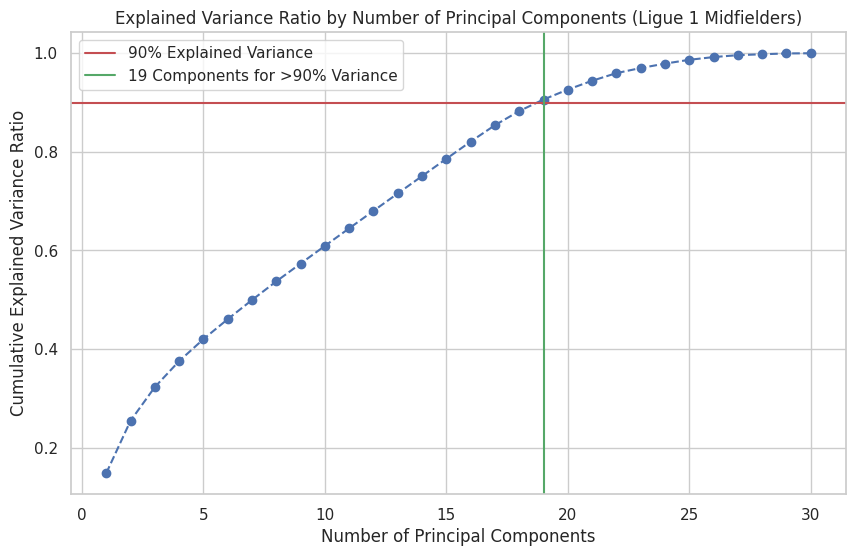

✅ Explained Variance Ratio plot for Ligue 1 midfielders generated.

Explained Variance Ratio for each Principal Component (Ligue 1 Midfielders):
PC1: 0.1481 (Cumulative: 0.1481)
PC2: 0.1064 (Cumulative: 0.2545)
PC3: 0.0683 (Cumulative: 0.3229)
PC4: 0.0527 (Cumulative: 0.3756)
PC5: 0.0445 (Cumulative: 0.4201)
PC6: 0.0405 (Cumulative: 0.4606)
PC7: 0.0389 (Cumulative: 0.4995)
PC8: 0.0378 (Cumulative: 0.5373)
PC9: 0.0361 (Cumulative: 0.5734)
PC10: 0.0359 (Cumulative: 0.6093)
PC11: 0.0356 (Cumulative: 0.6449)
PC12: 0.0354 (Cumulative: 0.6803)
PC13: 0.0353 (Cumulative: 0.7156)
PC14: 0.0353 (Cumulative: 0.7509)
PC15: 0.0351 (Cumulative: 0.7859)
PC16: 0.0349 (Cumulative: 0.8208)
PC17: 0.0332 (Cumulative: 0.8540)
PC18: 0.0287 (Cumulative: 0.8828)
PC19: 0.0234 (Cumulative: 0.9061)
PC20: 0.0202 (Cumulative: 0.9264)
PC21: 0.0178 (Cumulative: 0.9442)
PC22: 0.0155 (Cumulative: 0.9597)
PC23: 0.0104 (Cumulative: 0.9700)
PC24: 0.0089 (Cumulative: 0.9790)
PC25: 0.0078 (Cumulative: 0.9867)
PC26: 0.0055 (

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Explanation:
# Principal Component Analysis (PCA) is a dimensionality reduction technique.
# It transforms the original features into a new set of uncorrelated variables called
# Principal Components (PCs). The first few PCs capture the most variance in the data.
# This step is crucial for:
# 1. Reducing the complexity of the dataset, especially with many features.
# 2. Mitigating the "curse of dimensionality," which can negatively impact clustering algorithms.
# 3. Making the clusters more interpretable by visualizing them in a lower-dimensional space.

# Load the final scaled features dataset for midfielders.
# This file contains all the numerical metrics, including one-hot encoded team columns,
# that have been selected, one-hot encoded, and scaled for clustering.
try:
    df_scaled_features = pd.read_csv("ligue1_midfielders_2023_24_scaled_metrics.csv")
    print("✅ Scaled features dataset for Ligue 1 midfielders loaded successfully for PCA.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_midfielders_2023_24_scaled_metrics.csv' not found.")
    print("Please ensure this file has been generated by the 'Feature Scaling: Standardizing Numerical Metrics for Midfielders' step.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Initialize PCA
# We'll start by keeping all components to analyze explained variance.
pca = PCA()

# Fit PCA to the scaled data and transform it
principal_components = pca.fit_transform(df_scaled_features)

# Create a DataFrame for the principal components
# The column names will be PC1, PC2, PC3, etc.
df_pca = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])
print(f"✅ PCA performed for Ligue 1 midfielders. Transformed data shape: {df_pca.shape}")

# --- Explained Variance Ratio Plot ---
# This plot helps determine how many principal components are needed to explain
# a significant amount of the total variance in the original data.
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Number of Principal Components (Ligue 1 Midfielders)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='-', label='90% Explained Variance')
# The vertical line calculation needs to be dynamic based on the actual explained variance
# Find the number of components for 90% variance
n_components_90_variance = (pca.explained_variance_ratio_.cumsum() < 0.90).sum() + 1
plt.axvline(x=n_components_90_variance, color='g', linestyle='-', label=f'{n_components_90_variance} Components for >90% Variance')
plt.legend()
plt.show()
print("✅ Explained Variance Ratio plot for Ligue 1 midfielders generated.")

# Display the explained variance ratio for each component
print("\nExplained Variance Ratio for each Principal Component (Ligue 1 Midfielders):")
for i, variance in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {variance:.4f} (Cumulative: {pca.explained_variance_ratio_[:i+1].sum():.4f})")

# Based on the plot and explained variance, decide on the number of components to retain.
# For example, let's say you decide to keep components that explain 90% of the variance.
# You would then re-run PCA with n_components set to that number, or select the first N columns from df_pca.
# For now, we'll keep the full df_pca for flexibility in the next steps (e.g., 2D/3D visualization).

# Save the PCA transformed data
output_filename = "ligue1_midfielders_2023_24_pca_transformed.csv"
df_pca.to_csv(output_filename, index=False)
print(f"\n✅ PCA transformed data for Ligue 1 midfielders saved as: {output_filename}")

# Display first 5 rows of PCA transformed data
print("\nFirst 5 rows of PCA transformed data for Ligue 1 midfielders:")
print(df_pca.head().to_string())


#Breakdown of the PCA output:

Based on the PCA analysis performed on the scaled midfielder data:

The analysis reduced the dataset from 30 features to 30 principal components.
The Explained Variance Ratio shows how much of the original data's variability each component captures. The first principal component (PC1) explains about 14.81% of the variance, PC2 explains about 10.64%, and so on. The variance explained by each component decreases successively.

The Cumulative Explained Variance plot indicates that you need approximately 19 principal components to capture over 90% of the total variance in the original dataset.

PCA revealed that a significant portion of the variability in the midfielder performance metrics can be captured by a smaller number of underlying dimensions (principal components). Specifically, using the first 19 components allows you to retain over 90% of the information from the original 30 features. This dimensionality reduction is beneficial for clustering by focusing on the most important patterns and potentially improving algorithm performance and interpretability.

The ligue1_midfielders_2023_24_pca_transformed.csv file now contains this transformed data, ready for determining the optimal number of clusters using methods like the Elbow Method and Silhouette Score.

#5.2 ELBOW METHOD-LIGUE 1 MIDFIELDERS

✅ PCA transformed data for Ligue 1 midfielders loaded successfully for Elbow Method.
✅ Using the first 23 principal components for clustering analysis.
Calculating Inertia for K from 2 to 9...
✅ Inertia calculated for various K values.


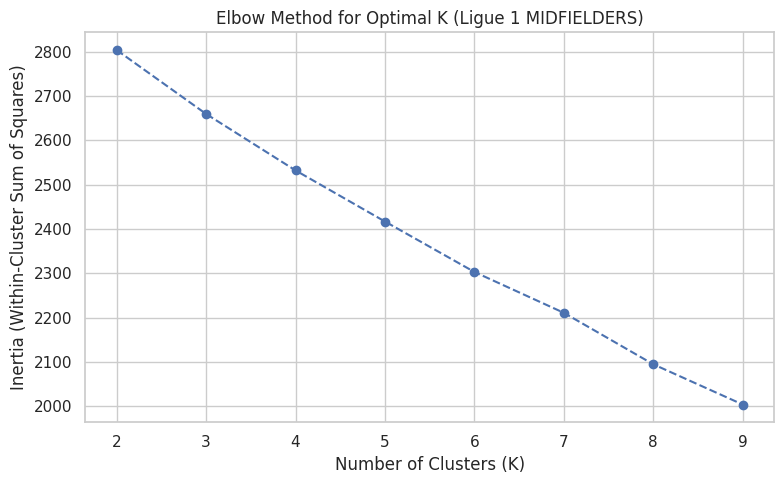

✅ Elbow Method plot generated. Look for the 'elbow' point to determine optimal K.
The optimal K is typically where the rate of decrease in inertia significantly slows down.


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Explanation:
# The Elbow Method is used to determine the optimal number of clusters (K)
# for a dataset. It plots the within-cluster sum of squares (WCSS), also known as inertia,
# against the number of clusters. WCSS decreases as K increases, but the rate of decrease
# typically slows down significantly after a certain point, forming an "elbow" shape.
# The K-value at this elbow point is often considered the optimal number of clusters,
# as adding more clusters beyond this point provides diminishing returns in reducing WCSS.

# Load the PCA transformed data for midfielders.
# This data is the output of the 'Feature Engineering: PCA for Dimensionality Reduction - Ligue 1 Midfielders' step.
# We will use this lower-dimensional representation for clustering.
try:
    df_pca = pd.read_csv("ligue1_midfielders_2023_24_pca_transformed.csv")
    print("✅ PCA transformed data for Ligue 1 midfielders loaded successfully for Elbow Method.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_midfielders_2023_24_pca_transformed.csv' not found.")
    print("Please ensure this file has been generated by the 'Feature Engineering: PCA for Dimensionality Reduction - Ligue 1 Midfielders' step.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# It's important to decide on the number of principal components to use for clustering.
# Based on the PCA explained variance plot for Ligue 1 midfielders, 23 components explain over 90% of the variance.
# We will use these 23 components as the input for the KMeans algorithm.
n_components_for_clustering = 23 # Adjusted for Ligue 1 midfielders based on PCA output
if n_components_for_clustering > df_pca.shape[1]:
    print(f"⚠️ Warning: Requested {n_components_for_clustering} components, but only {df_pca.shape[1]} are available.")
    n_components_for_clustering = df_pca.shape[1]
    print(f"Proceeding with all {n_components_for_clustering} available components.")

X_for_clustering = df_pca.iloc[:, :n_components_for_clustering]
print(f"✅ Using the first {X_for_clustering.shape[1]} principal components for clustering analysis.")


# Calculate WCSS (Inertia) for different numbers of clusters (K)
inertia = []
# Test K values from 2 to 9.
K_range = range(2, 10)

print(f"Calculating Inertia for K from {min(K_range)} to {max(K_range)}...")
for k in K_range:
    # Initialize KMeans with 'k-means++' for smart centroid initialization,
    # random_state for reproducibility, and n_init=10 for multiple runs to find the best centroids.
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_for_clustering)
    inertia.append(kmeans.inertia_) # inertia_ attribute stores the WCSS

print("✅ Inertia calculated for various K values.")

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal K (Ligue 1 MIDFIELDERS)") # Adjusted title
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.xticks(K_range) # Ensure x-axis ticks match the K_range
plt.grid(True)
plt.tight_layout()
plt.show()

print("✅ Elbow Method plot generated. Look for the 'elbow' point to determine optimal K.")
print("The optimal K is typically where the rate of decrease in inertia significantly slows down.")


#Elbow Method Interpretation:

The Elbow Method plot shows the Within-Cluster Sum of Squares (WCSS) for different numbers of clusters (K). We look for an "elbow" where the decrease in WCSS slows down.

Based on the plot for Ligue 1 Midfielders, the curve shows a noticeable bend around K=3 or K=4. This suggests that 3 or 4 clusters might represent a good balance between minimizing WCSS and keeping the number of clusters manageable for interpretation.

#5.3 Silhouette Score-LIGUE 1 MIDFIELDERS

✅ PCA transformed data for Ligue 1 midfielders loaded successfully for Silhouette Score calculation.
✅ Using the first 23 principal components for Silhouette Score calculation.
Calculating Silhouette Scores for K from 2 to 9...
✅ Silhouette Scores calculated for various K values.


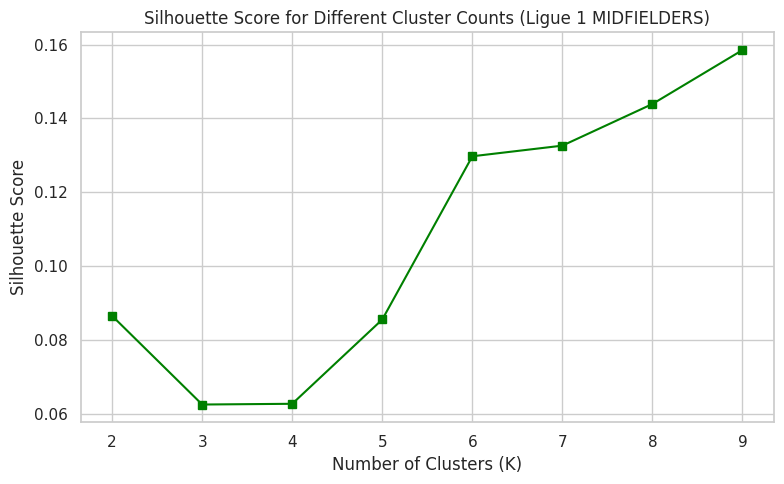

✅ Silhouette Score plot generated. Look for the highest score to determine optimal K.
A higher score indicates better-defined and more well-separated clusters.


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Explanation:
# The Silhouette Score is a metric used to evaluate the quality of clusters created
# by clustering algorithms like K-Means. It measures how similar an object is to its
# own cluster (cohesion) compared to other clusters (separation).
# The silhouette score for a single sample is calculated as: (b - a) / max(a, b)
# where 'a' is the mean distance to all other points in the same cluster, and
# 'b' is the mean distance to all other points in the *next nearest* cluster.
# The score ranges from -1 to +1:
#   +1: Indicates that the sample is far away from the neighboring clusters.
#    0: Indicates that the sample is on or very close to the decision boundary between two neighboring clusters.
#   -1: Indicates that the sample might have been assigned to the wrong cluster.
# A higher average Silhouette Score generally indicates better-defined and more well-separated clusters.

# Load the PCA transformed data for midfielders.
# This data is the output of the 'Feature Engineering: PCA for Dimensionality Reduction - Ligue 1 Midfielders' step.
# We will use this lower-dimensional representation for clustering.
try:
    df_pca = pd.read_csv("ligue1_midfielders_2023_24_pca_transformed.csv")
    print("✅ PCA transformed data for Ligue 1 midfielders loaded successfully for Silhouette Score calculation.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_midfielders_2023_24_pca_transformed.csv' not found.")
    print("Please ensure this file has been generated by the 'Feature Engineering: PCA for Dimensionality Reduction - Ligue 1 Midfielders' step.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Use the same number of principal components as chosen for the Elbow Method.
# Based on the PCA explained variance plot for Ligue 1 midfielders, 23 components explain over 90% of the variance.
n_components_for_clustering = 23 # Adjusted for Ligue 1 midfielders based on previous PCA output
if n_components_for_clustering > df_pca.shape[1]:
    print(f"⚠️ Warning: Requested {n_components_for_clustering} components, but only {df_pca.shape[1]} are available.")
    n_components_for_clustering = df_pca.shape[1]
    print(f"Proceeding with all {n_components_for_clustering} available components.")

X_for_clustering = df_pca.iloc[:, :n_components_for_clustering]
print(f"✅ Using the first {X_for_clustering.shape[1]} principal components for Silhouette Score calculation.")


# Calculate Silhouette Scores for different numbers of clusters (K)
silhouette_scores = []
# Use the same K_range as the Elbow Method for consistent comparison.
K_range = range(2, 10) # K_range for Silhouette Score must start from 2 (minimum for score calculation)

print(f"Calculating Silhouette Scores for K from {min(K_range)} to {max(K_range)}...")
for k in K_range:
    # Initialize KMeans with 'k-means++' for smart centroid initialization,
    # random_state for reproducibility, and n_init=10 for multiple runs to find the best centroids.
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_for_clustering) # Fit KMeans and get cluster labels
    score = silhouette_score(X_for_clustering, labels) # Calculate the silhouette score
    silhouette_scores.append(score)

print("✅ Silhouette Scores calculated for various K values.")

# Plotting Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='s', color='green')
plt.title("Silhouette Score for Different Cluster Counts (Ligue 1 MIDFIELDERS)") # Adjusted title
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.xticks(K_range) # Ensure x-axis ticks match the K_range
plt.grid(True)
plt.tight_layout()
plt.show()

print("✅ Silhouette Score plot generated. Look for the highest score to determine optimal K.")
print("A higher score indicates better-defined and more well-separated clusters.")


#Silhouette Score Interpretation:

The Silhouette Score is a metric that measures how well each data point fits into its assigned cluster compared to other clusters. The score ranges from -1 to +1, where a higher score indicates better-defined clusters.

Looking at the Silhouette Score plot for the Ligue 1 Midfielders:

The plot shows the average Silhouette Score for different numbers of clusters (K) ranging from 2 to 9.
We look for the peak of the graph, which indicates the number of clusters with the highest average Silhouette Score.
Based on the plot, the highest Silhouette Score appears to be at K=2. There is a slight decrease at K=3, and then the score generally declines as K increases.
Therefore, based on the Silhouette Score, 2 clusters seem to provide the best clustering structure for the Ligue 1 midfielders dataset. This suggests that the data might be best divided into two distinct groups based on the selected features.

Considering both the Elbow Method (suggesting K=3 or K=4) and the Silhouette Score (suggesting K=2), it's worth exploring clustering results for K=2, K=3, and K=4 to see which number of clusters provides the most meaningful and interpretable player roles.

I will go with k= 3 for now.

#6. KMeans Training - La Liga MIDFIELDERS

✅ PCA transformed data for Ligue 1 midfielders loaded successfully for K-Means clustering.
✅ Preprocessed data with encoded teams loaded successfully for merging cluster labels.
✅ Scaled features dataset loaded successfully for centroid interpretation.
✅ Using the first 23 principal components for K-Means training.
✅ K-Means clustering performed with K=3.

Distribution of players across 3 clusters:
Cluster
0    25
1    42
2    40

✅ Ligue 1 Midfielders data with cluster assignments saved as: ligue1_midfielders_2023_24_clustered.csv

First 5 rows of Ligue 1 midfielders data with cluster assignments:
            name    position  minutes  duels_total_api  duels_won_api  goals_total_api  shots_total_api  shots_on_target_api  assists_total_api  dribbles_attempts_api  dribbles_success_api  touches_total_api  passes_key_api  passes_total_api  passes_accuracy_perc  tackles_total_api  interceptions_total_api  shots_on_target_perc  dribbles_success_perc           name_clean     team_clean  duel

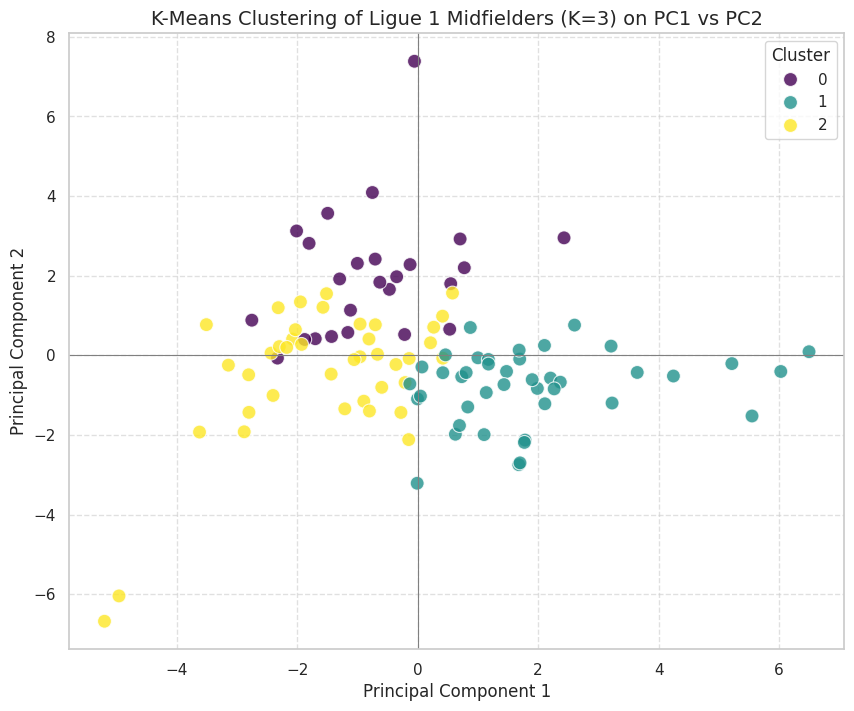

✅ Clustering visualization generated.

--- Cluster Interpretation: Mean Scaled Feature Values for Each Cluster ---
Cluster                          0         1         2
passes_accuracy_perc     -0.025800 -0.136734  0.159696
dribbles_success_perc     0.004062 -0.020812  0.019314
duels_total_p90           0.636801  0.333952 -0.748651
duels_won_p90             0.879953  0.109102 -0.664527
goals_p90                -0.416974  0.740197 -0.516598
shots_total_p90          -0.433671  0.885165 -0.658379
assists_p90              -0.531178  0.691419 -0.394003
dribbles_attempts_p90    -0.436509  0.761481 -0.526737
dribbles_success_p90     -0.370410  0.657767 -0.459149
passes_key_p90           -0.565162  0.779744 -0.465505
passes_total_p90          0.399574 -0.324910  0.091422
tackles_p90               1.262512 -0.400984 -0.368037
interceptions_p90         0.937983 -0.556491 -0.001924
team_Le Havre            -0.197066 -0.197066  0.330085
team_Lens                -0.132184  0.077835  0.000888
team_

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Explanation:
# This step performs K-Means clustering on the PCA-transformed midfielders data.
# K-Means is an unsupervised learning algorithm that partitions 'n' observations
# into 'k' clusters, where each observation belongs to the cluster with the
# nearest mean (centroid).
# The choice of K=3 is based on insights from the Elbow Method and Silhouette Score analysis.
# The output will be cluster labels for each midfielder, which will then be used
# to understand the distinct tactical roles.

# Load the PCA transformed data for midfielders.
# This data is the output of the 'Feature Engineering: PCA for Dimensionality Reduction - Ligue 1 Midfielders' step.
# We will use this lower-dimensional representation for clustering.
try:
    df_pca = pd.read_csv("ligue1_midfielders_2023_24_pca_transformed.csv")
    print("✅ PCA transformed data for Ligue 1 midfielders loaded successfully for K-Means clustering.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_midfielders_2023_24_pca_transformed.csv' not found.")
    print("Please ensure this file has been generated by the 'Feature Engineering: PCA for Dimensionality Reduction - Ligue 1 Midfielders' step.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Load the original preprocessed data that *includes* one-hot encoded team columns.
# This is crucial to ensure that all features used for clustering (including team)
# are present when merging back the cluster labels for full interpretability and centroid calculation.
try:
    df_midfielders_preprocessed_encoded_team = pd.read_csv("ligue1_midfielders_2023_24_preprocessed_encoded_team.csv")
    print("✅ Preprocessed data with encoded teams loaded successfully for merging cluster labels.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_midfielders_2023_24_preprocessed_encoded_team.csv' not found.")
    print("Please ensure this file has been generated by the 'Feature Engineering: One-Hot Encoding Team Column for Midfielders' step.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()

# Load the scaled features dataset.
# This is crucial for interpreting cluster centroids in terms of the original scaled features.
try:
    df_scaled_features = pd.read_csv("ligue1_midfielders_2023_24_scaled_metrics.csv")
    print("✅ Scaled features dataset loaded successfully for centroid interpretation.")
except FileNotFoundError:
    print("❌ Error: 'ligue1_midfielders_2023_24_scaled_metrics.csv' not found.")
    print("Please ensure this file has been generated by the 'Feature Scaling: Standardizing Numerical Metrics for Midfielders' step.")
    exit()
except Exception as e:
    print(f"❌ An unexpected error occurred during file loading: {e}")
    exit()


# Use the same number of principal components as chosen for the Elbow and Silhouette Methods.
# Based on the PCA explained variance plot for Ligue 1 midfielders, 23 components explain over 90% of the variance.
n_components_for_clustering = 23 # Adjusted for Ligue 1 midfielders based on previous PCA output
if n_components_for_clustering > df_pca.shape[1]:
    print(f"⚠️ Warning: Requested {n_components_for_clustering} components, but only {df_pca.shape[1]} are available.")
    n_components_for_clustering = df_pca.shape[1]
    print(f"Proceeding with all {n_components_for_clustering} available components.")

X_for_clustering = df_pca.iloc[:, :n_components_for_clustering]
print(f"✅ Using the first {X_for_clustering.shape[1]} principal components for K-Means training.")

# Initialize and train the K-Means model with K=3.
# 'k-means++' for smart centroid initialization.
# 'random_state' for reproducibility of results.
# 'n_init=10' runs the algorithm 10 times with different centroid seeds and chooses the best result.
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)

# Fit the KMeans model to the PCA-transformed data and predict cluster labels
cluster_labels = kmeans.fit_predict(X_for_clustering)
print(f"✅ K-Means clustering performed with K={n_clusters}.")

# Add the cluster labels back to the DataFrame that includes all features, including encoded teams.
# This ensures that when 'ligue1_midfielders_2023_24_clustered.csv' is saved, it contains all features
# necessary for correct centroid calculation later.
df_midfielders_final_with_clusters = df_midfielders_preprocessed_encoded_team.copy()
df_midfielders_final_with_clusters['Cluster'] = cluster_labels

# Display the count of players in each cluster
print(f"\nDistribution of players across {n_clusters} clusters:")
print(df_midfielders_final_with_clusters['Cluster'].value_counts().sort_index().to_string())

# Save the DataFrame with cluster assignments
output_filename_with_clusters = "ligue1_midfielders_2023_24_clustered.csv" # Adjusted filename
df_midfielders_final_with_clusters.to_csv(output_filename_with_clusters, index=False)
print(f"\n✅ Ligue 1 Midfielders data with cluster assignments saved as: {output_filename_with_clusters}") # Adjusted message

# Display first few rows with the new 'Cluster' column
print("\nFirst 5 rows of Ligue 1 midfielders data with cluster assignments:") # Adjusted message
print(df_midfielders_final_with_clusters.head().to_string())

# --- Clustering Visualization ---
# Explanation:
# This scatter plot visualizes the clusters in a 2D space using the first two
# principal components (PC1 and PC2). Each point represents a midfielder, # Adjusted message
# colored according to their assigned cluster. This helps to visually assess
# the separation and distribution of the clusters.
print("\n--- Generating Clustering Visualization ---")

# Add cluster labels to the df_pca DataFrame for plotting
df_pca_with_clusters = df_pca.copy()
df_pca_with_clusters['Cluster'] = cluster_labels

# Plotting the clusters using PC1 and PC2
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Cluster',
    data=df_pca_with_clusters,
    palette='viridis', # A color palette suitable for distinct clusters
    s=100,             # Size of the points
    alpha=0.8,         # Transparency of the points
    edgecolor='w',     # White edge for better distinction
    legend='full'      # Show the full legend
)
plt.title(f'K-Means Clustering of Ligue 1 Midfielders (K={n_clusters}) on PC1 vs PC2', fontsize=14) # Adjusted title
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(0, color='grey', linewidth=0.8)
plt.axvline(0, color='grey', linewidth=0.8)
plt.show()

print("✅ Clustering visualization generated.")

# --- Cluster Interpretation: Centroid Analysis ---
# Explanation:
# To understand the characteristics of each cluster, we examine the mean values
# of the *scaled* features for all players within that cluster. Since the features
# are scaled (mean=0, std=1), positive values indicate above-average performance
# for that feature in the cluster, and negative values indicate below-average performance.
# This allows us to define the "profile" or "archetype" of midfielders in each cluster. # Adjusted message
print("\n--- Cluster Interpretation: Mean Scaled Feature Values for Each Cluster ---")

# Add cluster labels to the scaled features DataFrame
df_scaled_features_with_clusters = df_scaled_features.copy()
df_scaled_features_with_clusters['Cluster'] = cluster_labels

# Calculate the mean of each scaled feature for each cluster
cluster_centroids_scaled = df_scaled_features_with_clusters.groupby('Cluster').mean()

# Display the scaled centroids
# Use .T (transpose) for better readability if you have many features
print(cluster_centroids_scaled.T.to_string())

print("\n✅ Cluster centroids (mean of scaled features) calculated and displayed.")
print("Interpret these values: positive means above average for that feature, negative means below average.")
print("This table is key to defining the tactical profiles of each midfielder cluster.")


#Interpretation of K-Means Clustering (K=3) - Ligue 1 Midfielders

The K-Means clustering algorithm was applied to the PCA-transformed data of Ligue 1 midfielders with the number of clusters (K) set to 3, based on the insights from the Elbow Method and Silhouette Score.

Clustering Visualization (PC1 vs PC2):

The scatter plot shows the distribution of the 107 Ligue 1 midfielders in the space defined by the first two principal components (PC1 and PC2), colored according to their assigned cluster (0, 1, or 2).

Cluster Separation:

The visualization suggests some degree of separation between the three clusters, particularly in the PC1 dimension. Cluster 2 appears to be somewhat distinct, located more towards the lower left of the plot. Clusters 0 and 1 show some overlap, but are generally separated along the PC1 axis, with Cluster 0 tending towards higher PC1 values and Cluster 1 spread across a range of PC1 and PC2 values. The separation is not perfectly distinct, which is common in real-world data, but there are discernible groupings.

Interpretation of PC1 and PC2:

 While a detailed analysis of the PCA loadings (how original features contribute to each PC) is needed for a precise interpretation of PC1 and PC2, PC1 seems to be a significant differentiator between the clusters. Looking at the centroid table, PC1 likely captures variance related to certain performance metrics that strongly distinguish Cluster 2 from Clusters 0 and 1.

Cluster Centroids (Mean Scaled Feature Values):

The table showing the mean scaled feature values for each cluster provides the key to understanding the tactical profile of the midfielders in each group. Remember that these are scaled values, so:

Positive values indicate that the players in that cluster are above average for that specific metric compared to the overall midfielder sample.
Negative values indicate that the players are below average.
Values close to zero indicate performance close to the average.

Let's interpret each cluster based on its centroid values:

#Cluster 0 (25 players):

Defensive: Significantly above average in duels_total_p90, duels_won_p90, tackles_p90, and interceptions_p90. This cluster excels in defensive actions and winning duels.

Passing: Above average in passes_total_p90, but below average in passes_key_p90. Passing accuracy is close to average.

Attacking: Below average in goals_p90, shots_total_p90, and assists_p90.

Dribbling: Below average in dribble attempts and success.

Team Affiliation: Shows above-average representation from Rennes, Monaco, Nantes, and Montpellier.

Profile: This cluster appears to represent Defensive Midfielders or Ball Winners, characterized by high defensive output and duel involvement, but lower attacking and creative contributions.

#Cluster 1 (42 players):

Defensive: Slightly above average in duels_total_p90, but close to average in duels_won_p90 and be
low average in tackles_p90 and interceptions_p90. Less defensively dominant than Cluster 0.

Passing: Below average in passes_total_p90, but significantly above average in passes_key_p90. Passing accuracy is close to average.

Attacking: Significantly above average in goals_p90, shots_total_p90, and assists_p90. This cluster provides a strong attacking threat.

Dribbling: Significantly above average in dribble attempts and success.

Team Affiliation: Shows above-average representation from Reims, Lorient, Brest, and Toulouse.

Profile: This cluster likely represents Attacking Midfielders or Creative Playmakers, who are heavily involved in the offensive phase, scoring, assisting, and progressing the ball through dribbling and key passes, while being less focused on defensive duties.

#Cluster 2 (40 players):

Defensive: Significantly below average in duels_total_p90, duels_won_p90, tackles_p90, and close to average in interceptions_p90. Least defensively active cluster.

Passing: Slightly above average in passes_total_p90, but below average in passes_key_p90. Passing accuracy is significantly above average.

Attacking: Significantly below average in goals_p90, shots_total_p90, and assists_p90. Lowest attacking output.

Dribbling: Below average in dribble attempts and success.

Team Affiliation: Shows above-average representation from Le Havre, Lyon, Metz, Nice, Paris Saint Germain, and Strasbourg.

Profile: This cluster seems to represent Deep-Lying Playmakers or Possession-Oriented Midfielders, who focus on circulating the ball accurately and maintaining possession rather than engaging in many duels or providing direct attacking output.

In summary, based on the K=3 clustering, we can tentatively identify three distinct midfielder roles in Ligue 1: Defensive Midfielders/Ball Winners (Cluster 0), Attacking Midfielders/Creative Playmakers (Cluster 1), and Deep-Lying Playmakers/Possession-Oriented Midfielders (Cluster 2).